In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
laptop = pd.read_csv("../data/laptop.csv")
laptop.head(5)

id   price   brand        model  processor  ram memory  \
0  5bffcd46c3  129900   apple  MacBook Air        6.5           8   
1  24305711ad   27999  lenovo    Ideapad 1        2.0           4   
2  822dfcd434   69999    dell  Vostro 3520        5.0          16   
3  217f013439  101999    acer      Nitro 5        7.0          16   
4  afc24e7af0   61500      hp    Victus 15        5.0          16   

   display size  storage capacity  cpu cores  graphics card  rating  reviews  \
0          13.3               256          8           2500     4.8       73   
1          14.0               128          2           1000     3.3        3   
2          15.6               512         10           1000     4.5       13   
3          15.6               512          8           1650     5.0        1   
4          15.6               512          6           3050     4.6       10   

                                                name  \
0    Apple MacBook Air 13-inch M1 256GB - Oliz Store   
1  Lenovo Ideapad 1 Intel Celeron N4020 – 4GB DDR...   
2  Dell Vostro 3520 i5 12th Gen | 16GB RAM | 512G...   
3  Acer Nitro 5 Ryzen 7 5800H 16GB Ram 512GB SSD ...   
4  HP Victus 15 i5 13th Gen 13420H / 16GB DDR4 RA...   

                                                 url  \
0  https://www.daraz.com.np/products/apple-macboo...   
1  https://www.daraz.com.np/products/lenovo-ideap...   
2  https://www.daraz.com.np/products/dell-vostro-...   
3  https://www.daraz.com.np/products/acer-nitro-5...   
4  https://www.daraz.com.np/products/hp-victus-15...   

                                               image instock  
0  https://static-01.daraz.com.np/p/463576841e26f...     yes  
1                                                NaN      no  
2  https://static-01.daraz.com.np/p/12f269cac9ccb...     yes  
3                                                NaN      no  
4                                                NaN      no

### Exploratory Data Analysis

In [3]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1564 entries, 0 to 1563
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1564 non-null   object 
 1   price             1564 non-null   int64  
 2   brand             1564 non-null   object 
 3   model             1564 non-null   object 
 4   processor         1564 non-null   float64
 5   ram memory        1564 non-null   int64  
 6   display size      1564 non-null   float64
 7   storage capacity  1564 non-null   int64  
 8   cpu cores         1564 non-null   int64  
 9   graphics card     1564 non-null   int64  
 10  rating            1564 non-null   float64
 11  reviews           1564 non-null   int64  
 12  name              1564 non-null   object 
 13  url               1564 non-null   object 
 14  image             1375 non-null   object 
 15  instock           1564 non-null   object 
dtypes: float64(3), int64(6), object(7)
memory 

In [4]:
laptop.describe()
# laptop.isnull().sum()

price    processor   ram memory  display size  \
count    1564.000000  1564.000000  1564.000000   1564.000000   
mean   123543.181586     5.475064    10.528133     14.912276   
std     73742.517817     1.558320     5.081534      0.895630   
min     25500.000000     2.000000     4.000000     10.500000   
25%     73999.000000     5.000000     8.000000     14.000000   
50%    104994.500000     5.000000     8.000000     15.600000   
75%    150000.000000     7.000000    16.000000     15.600000   
max    555555.000000     9.000000    32.000000     17.300000   

       storage capacity    cpu cores  graphics card       rating      reviews  
count       1564.000000  1564.000000    1564.000000  1564.000000  1564.000000  
mean         540.153453     6.565857    1957.135550     0.286957     0.230818  
std          269.053509     2.955440    1003.521365     1.109482     2.194286  
min           64.000000     1.000000       0.000000     0.000000     0.000000  
25%          256.000000     4.000000    1000.000000     0.000000     0.000000  
50%          512.000000     6.000000    2000.000000     0.000000     0.000000  
75%          512.000000     8.000000    2800.000000     0.000000     0.000000  
max         2048.000000    24.000000    4070.000000     5.000000    73.000000

In [5]:
# Specify specific columns for which you want to print value counts
columns_to_check = [ 'brand', 'model', 'processor', 'storage capacity', 'ram memory', 'display size', 'cpu cores'] 

# Iterate through specified columns and print value counts
for column in columns_to_check:
    print("Column:", column)
    print(laptop[column].nunique())
    print()

Column: brand
22

Column: model
557

Column: processor
8

Column: storage capacity
6

Column: ram memory
7

Column: display size
16

Column: cpu cores
12



### Basic Visualization

In [6]:
attributes = list(laptop.columns)
excluded_cols = ['brand', 'model', 'name', 'id', 'url', 'image', 'instock']
numeric_cols = [col for col in attributes if col not in excluded_cols]
excluded_cols = ['model', 'name', 'price', 'id', 'url', 'image', 'instock']
count_cols = [col for col in attributes if col not in excluded_cols]
excluded_cols = ['model', 'name', 'id', 'url', 'image', 'instock']
pair_cols = [col for col in attributes if col not in excluded_cols]
excluded_cols = ['model', 'name', 'brand', 'rating', 'reviews', 'id', 'url', 'image', 'instock']
brand_cols = [col for col in attributes if col not in excluded_cols]

In [7]:
cols = list(laptop.columns)

# Remove the specified columns
excluded_cols = ['id', 'brand', 'model', 'rating', 'reviews', 'name', 'url', 'image', 'instock']
cols = [col for col in cols if col not in excluded_cols]

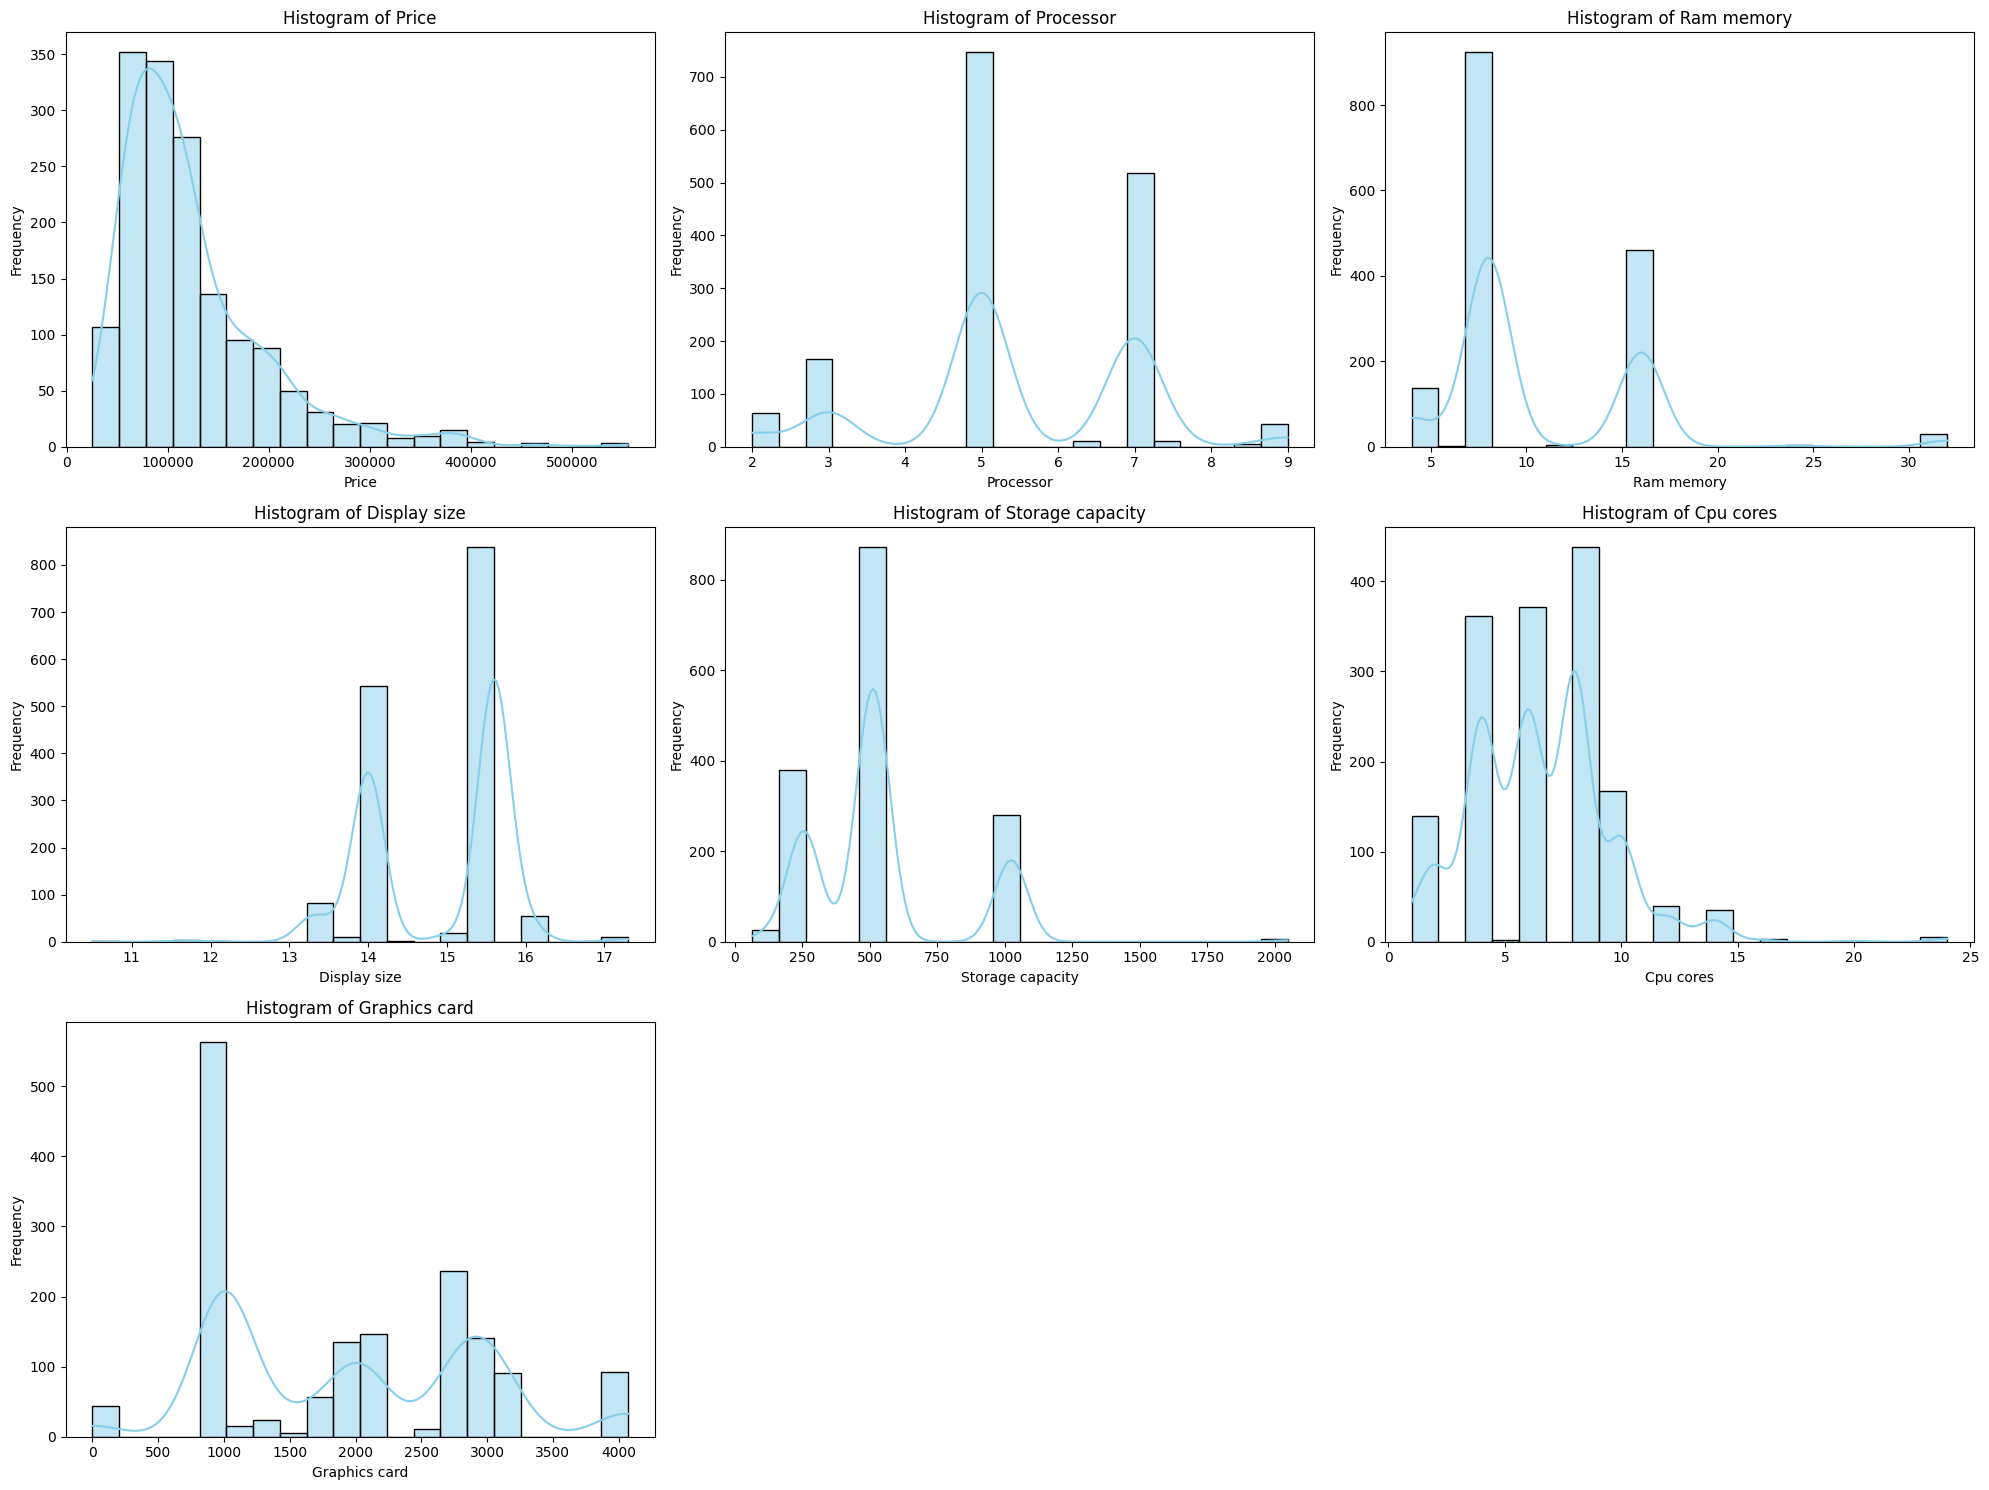

In [8]:
# Number of columns per row
cols_per_row = 3

# Number of rows needed
num_rows = int(np.ceil(len(cols) / cols_per_row))

# Create subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create a histogram
for i, col in enumerate(cols):
    sns.histplot(data=laptop, x=col, bins=20, color='skyblue', kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {col.capitalize()}')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

### Bivariate Visualization

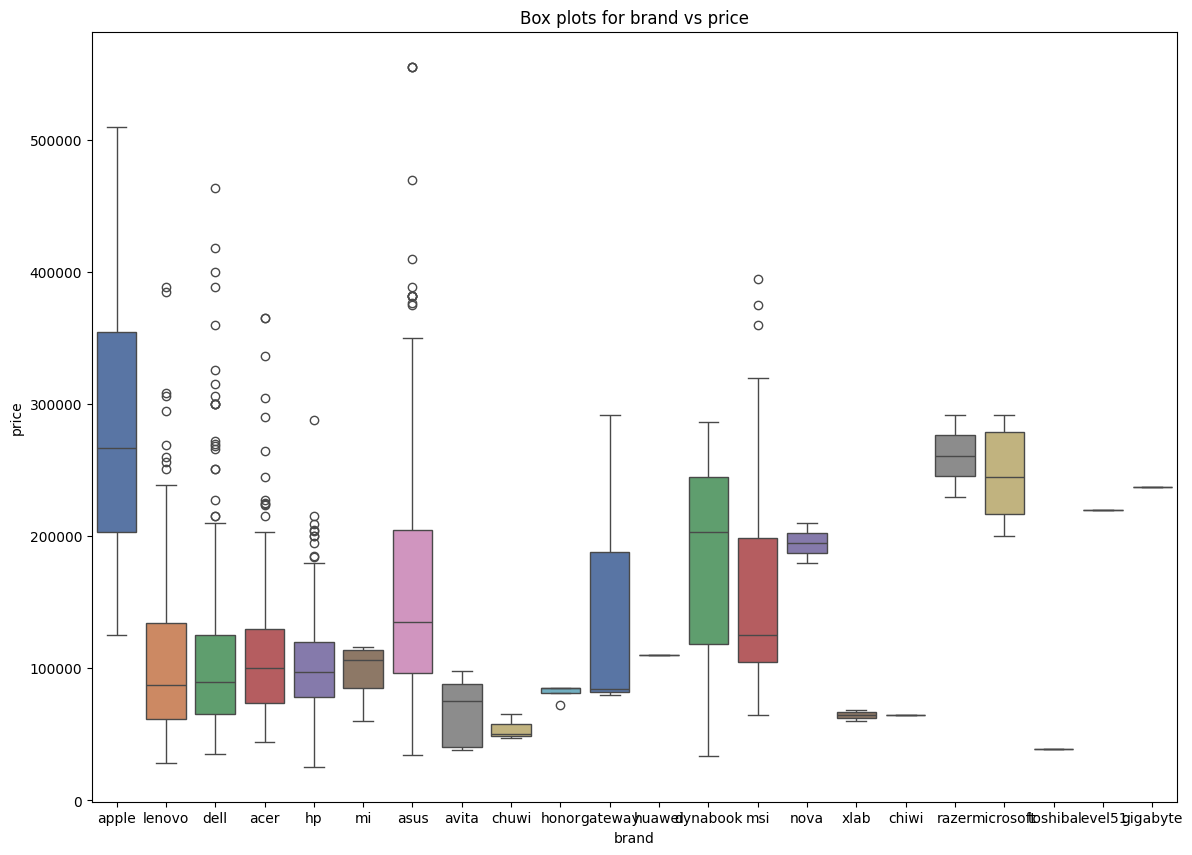

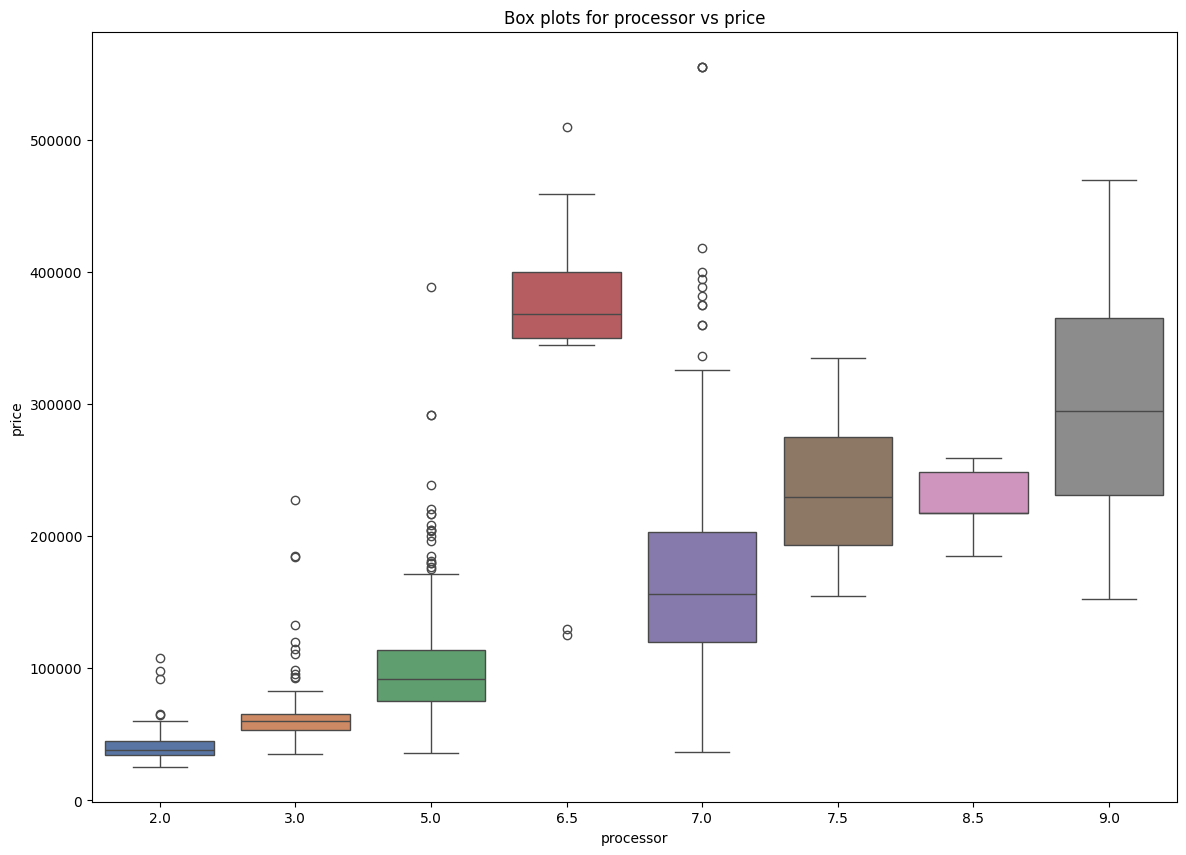

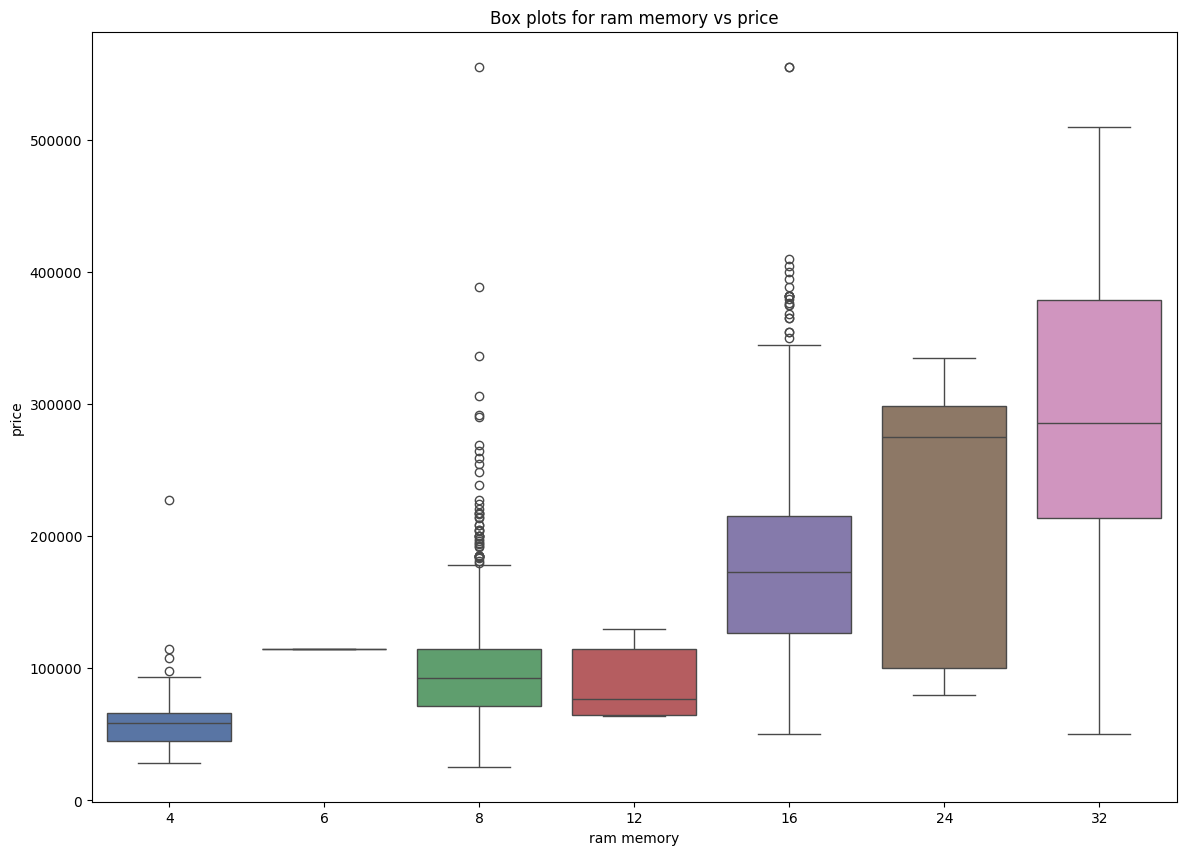

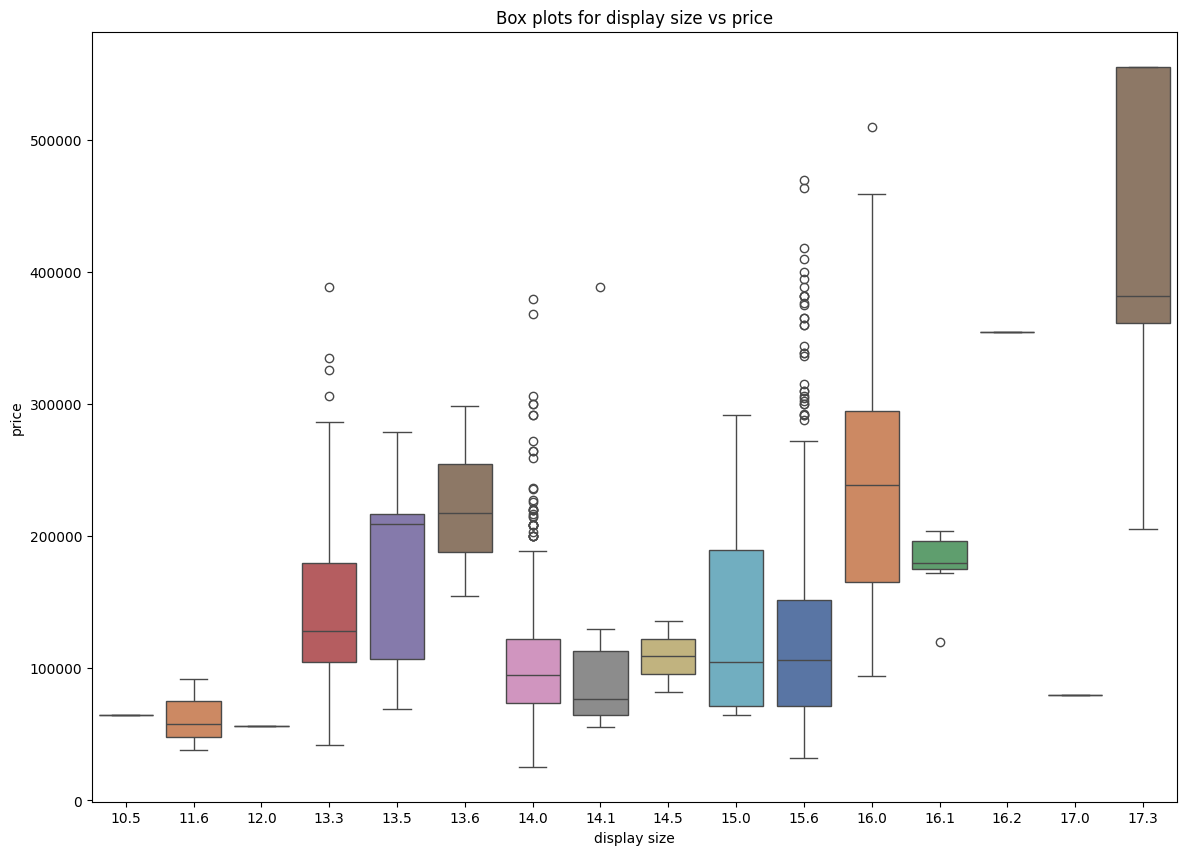

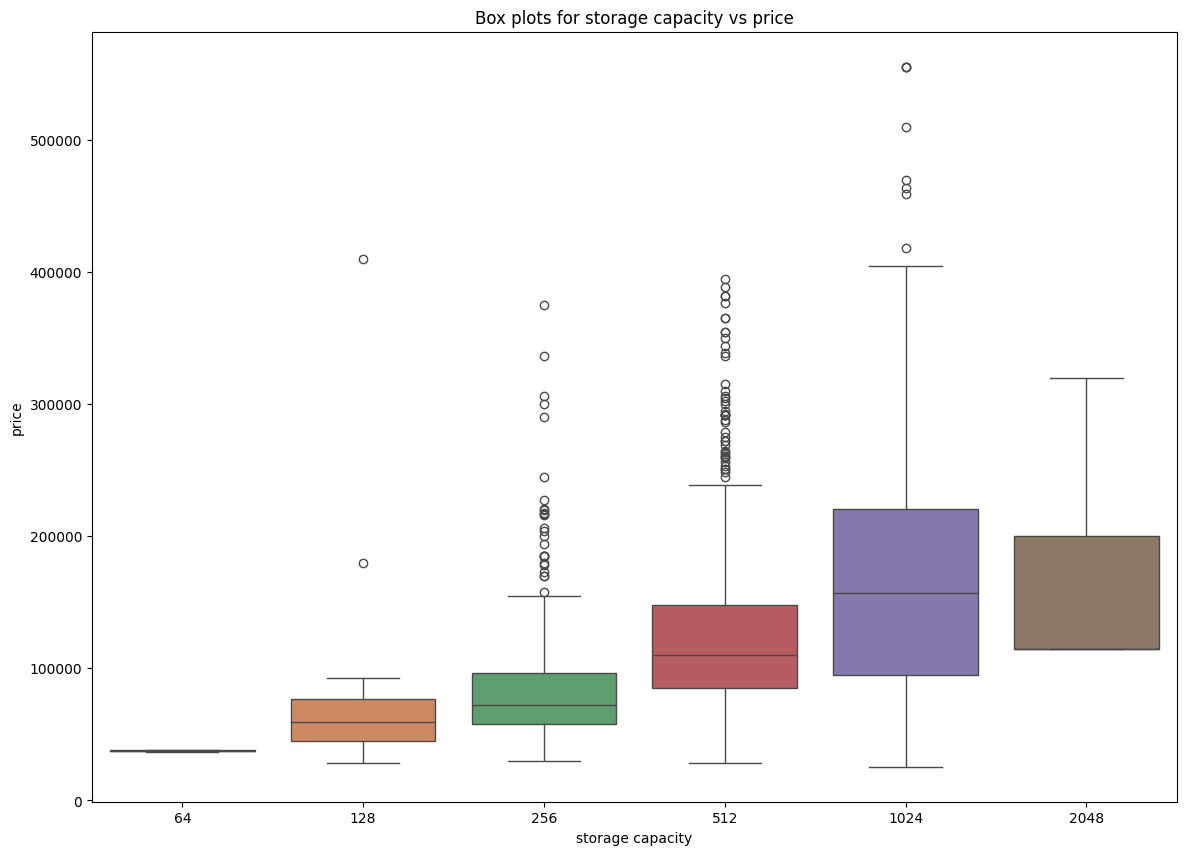

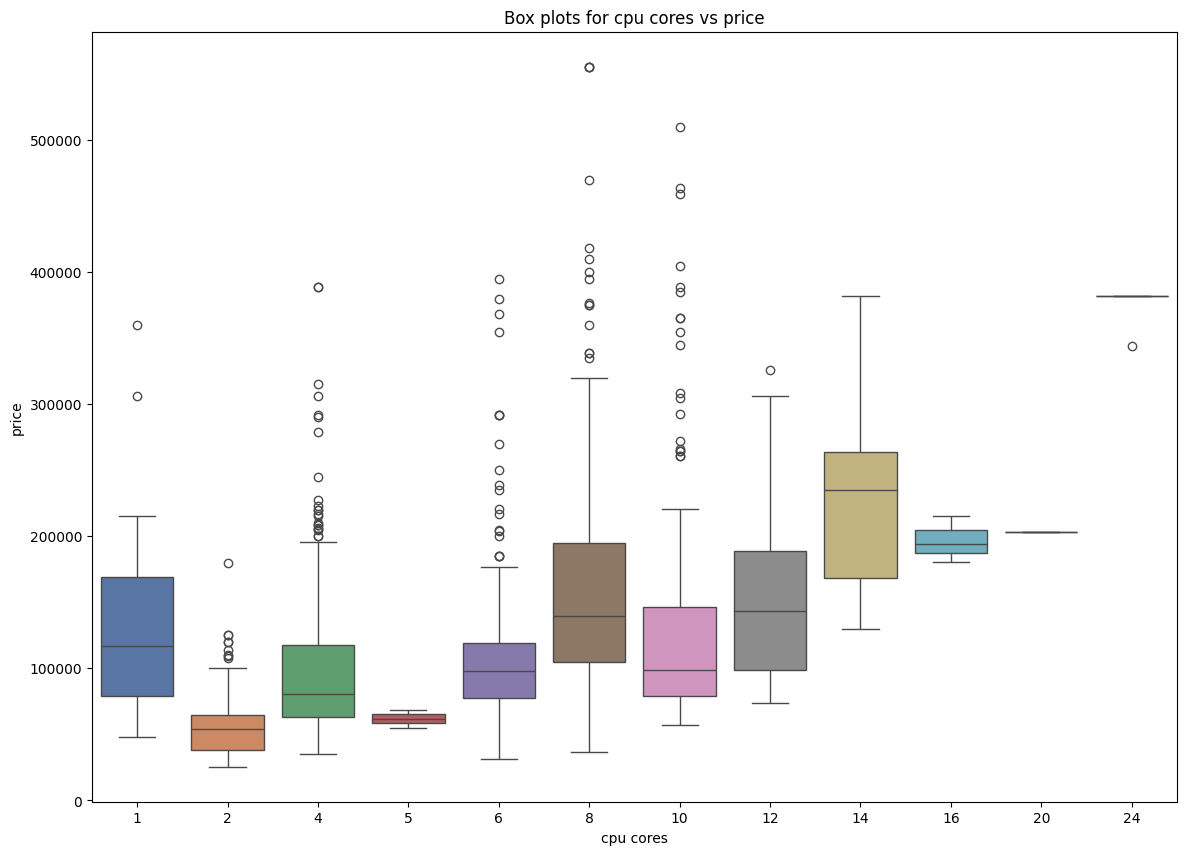

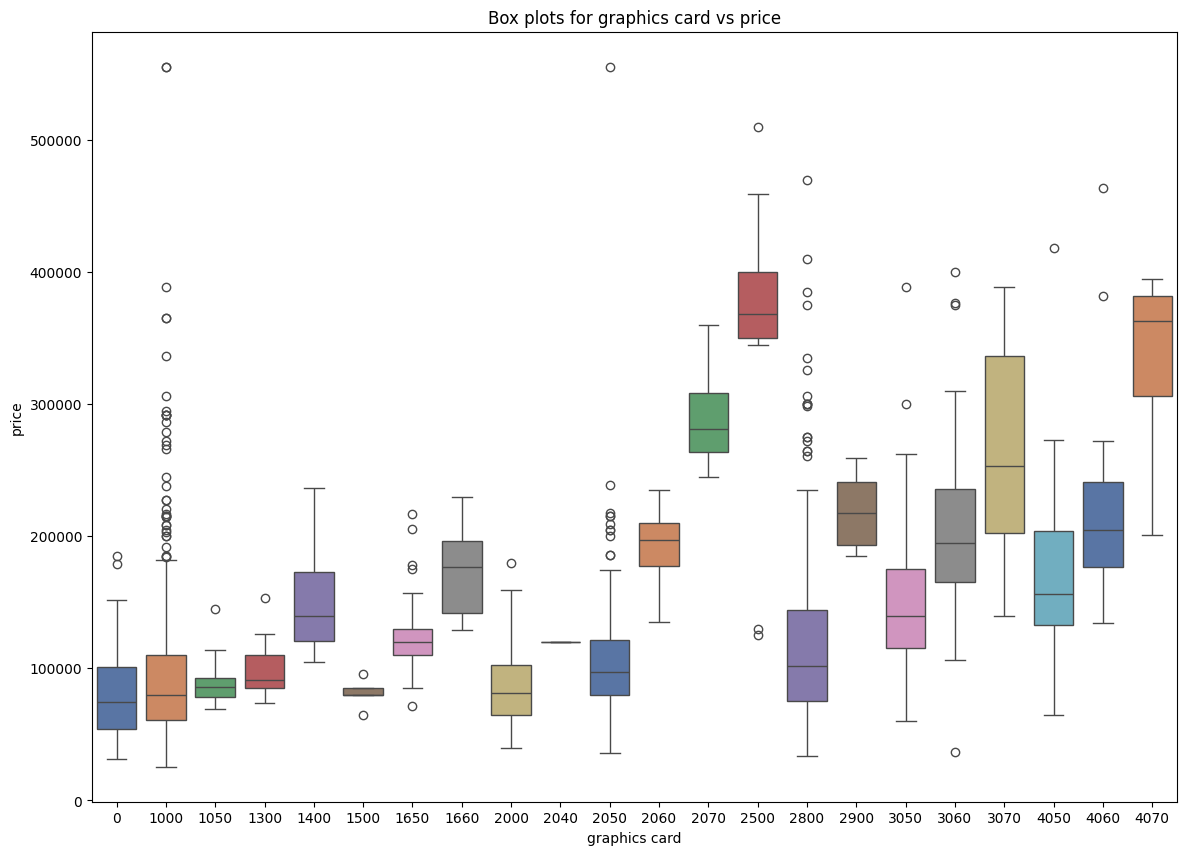

In [9]:
cols_to_plot = ['brand', 'processor', 'ram memory', 'display size', 'storage capacity', 'cpu cores', 'graphics card']

for col in cols_to_plot:
    plt.figure(figsize=(14,10))
    sns.boxplot(data=laptop, x=col , y='price', hue=col, palette='deep')
    plt.legend([], [], frameon=False)
    plt.title(f'Box plots for {col} vs price')
    plt.show()

##### Brandwise Average Analysis

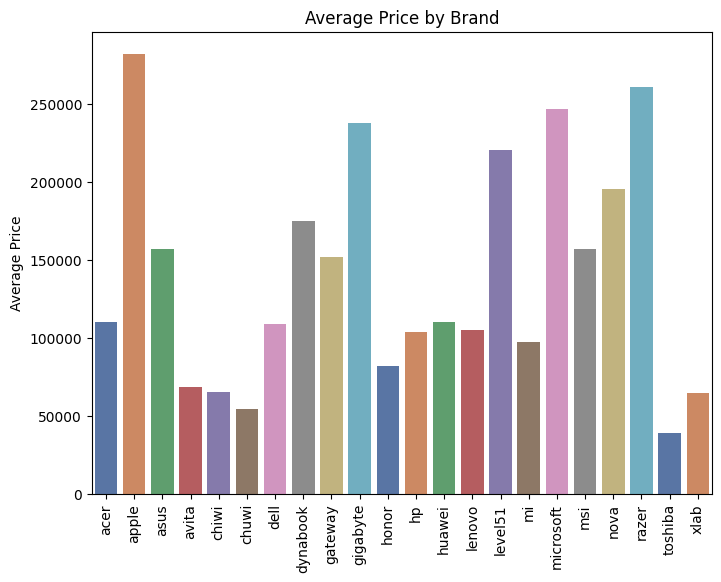

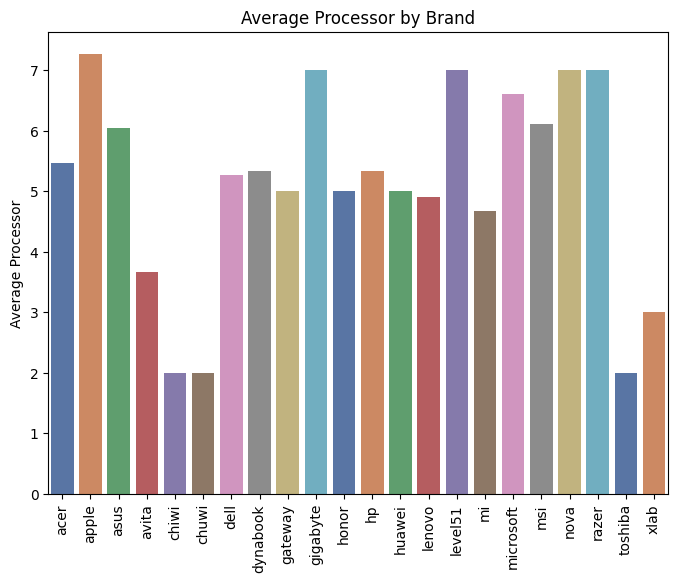

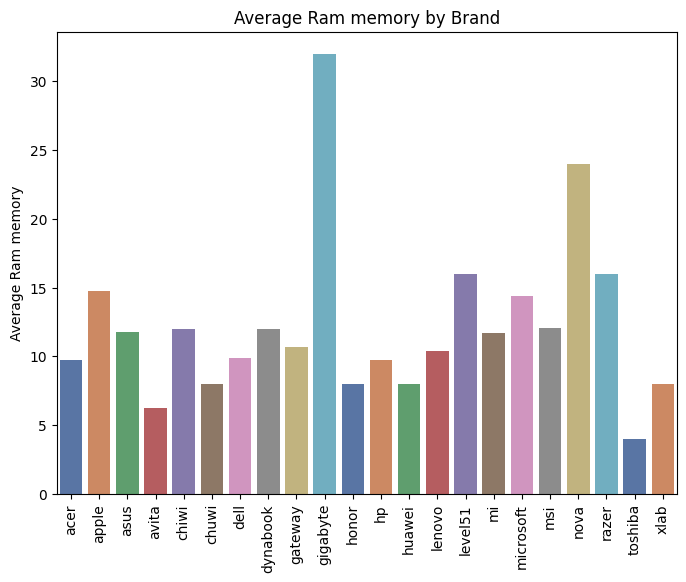

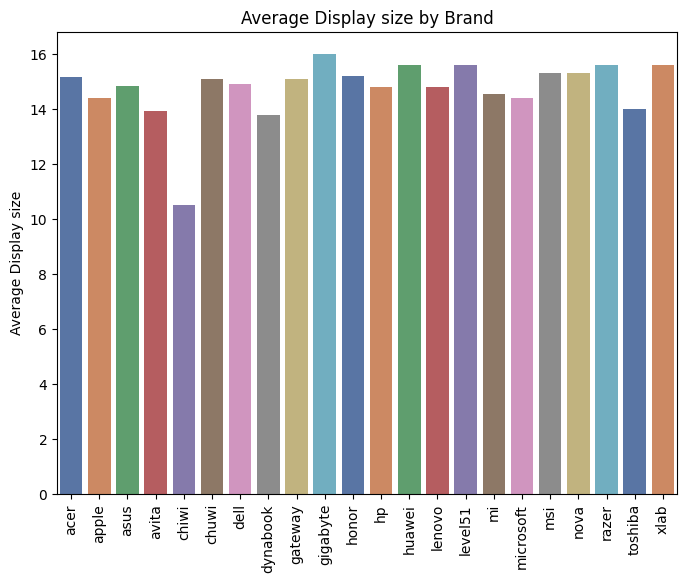

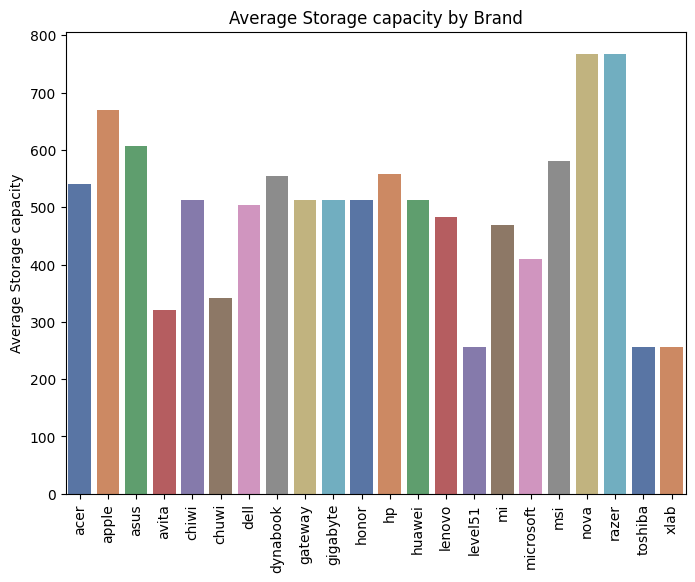

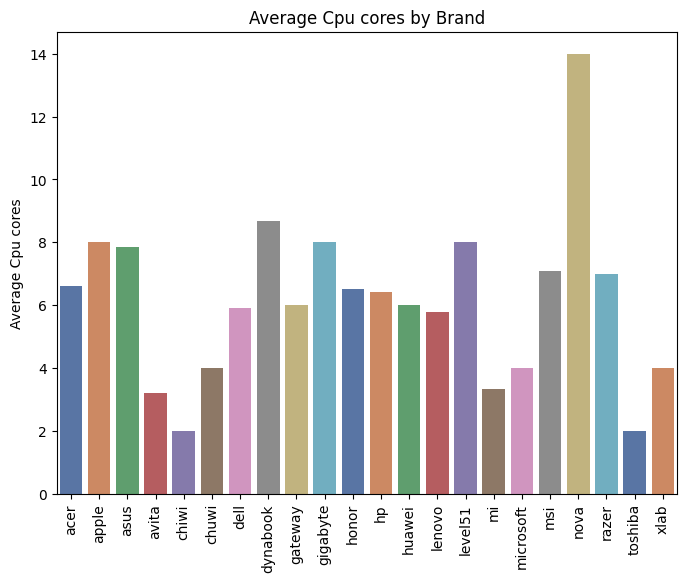

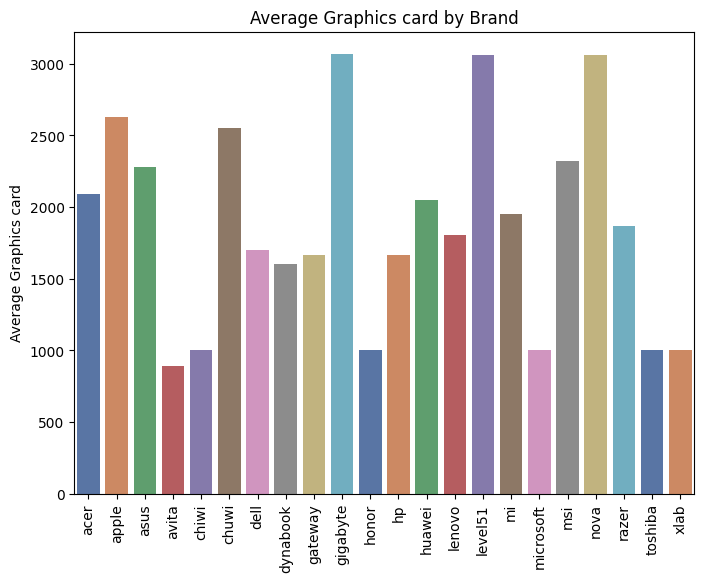

In [10]:
brand_analysis = laptop.groupby('brand').agg({
    'price': 'mean',
    'rating': 'mean',
    'processor': 'mean',
    'ram memory': 'mean',
    'display size': 'mean',
    'storage capacity': 'mean',
    'cpu cores': 'mean',
    'graphics card': 'mean'
}).reset_index()

for i, col in enumerate(brand_cols, 1):
    plt.figure(figsize=(8, 6))
    sns.barplot(data=brand_analysis, x='brand', y=col, hue='brand', palette='deep')
    plt.xticks(rotation=90)
    plt.title(f'Average {col.capitalize()} by Brand')
    plt.xlabel('')
    plt.ylabel(f'Average {col.capitalize()}')
    plt.show()

### 1. What do best brands  offer?
- If you are buying from Daraz, you should consider brands DEll, Lenova, Acer, Asus, MSI and Apple(debatable) because since they have more number present than others, they are reliable.
- Therefore, we considered the **Top Brands**:
    - Acer, 
    - Asus, 
    - Lenovo, 
    - Dell, 
    - Apple, 
    - MSI


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


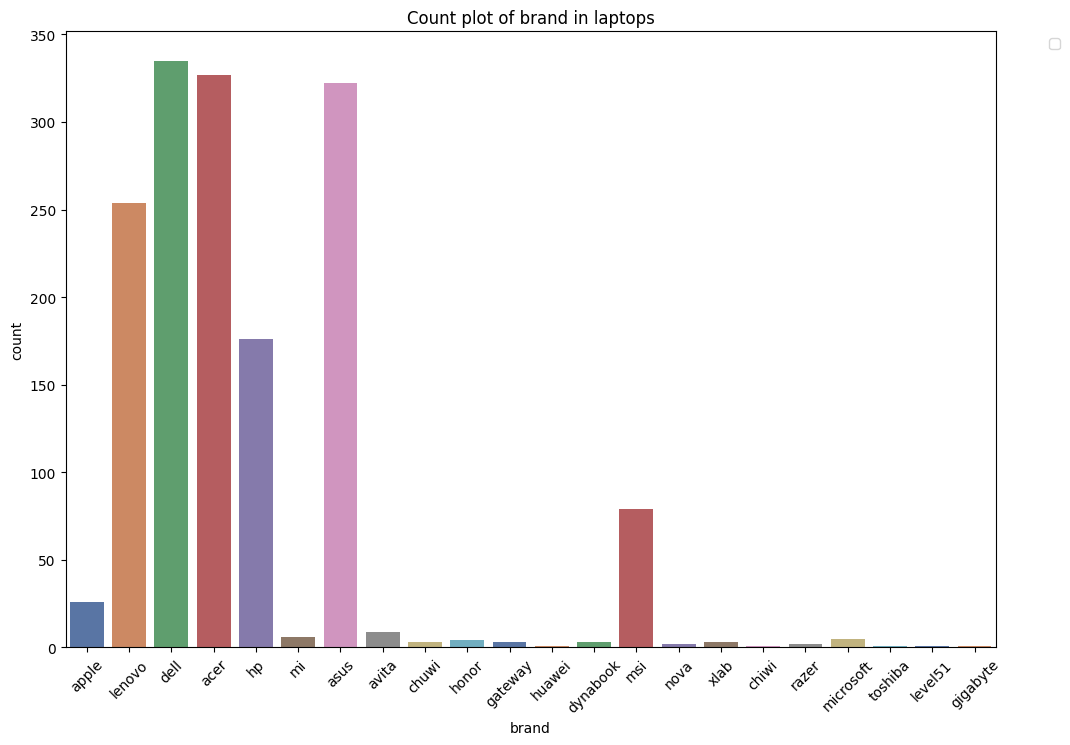

In [11]:
col='brand'
plt.figure(figsize=(12,8))
sns.countplot(data=laptop, x=col, hue=col, palette='deep')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title(f"Count plot of {col} in laptops")
plt.show()

##### Histograms of Price, Processor, Ram, Storage, CpuCores, and DisplaySize with **Top Brands**

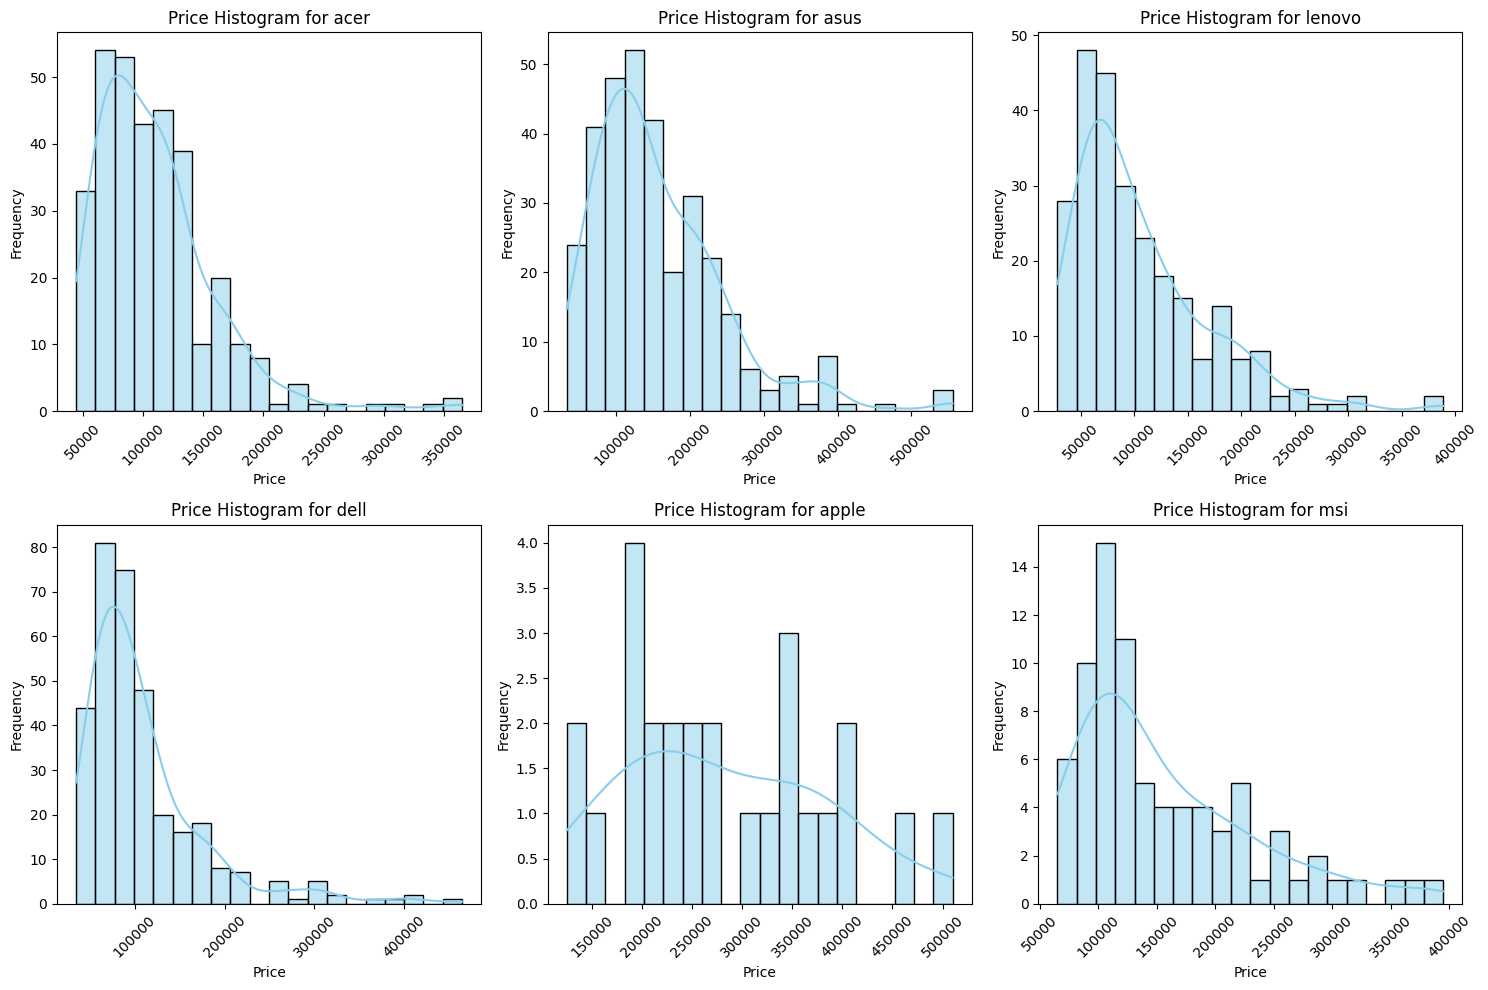

In [12]:
brands = ['acer', 'asus', 'lenovo', 'dell', 'apple', 'msi']

num_brands = len(brands)

cols_per_row = 3

num_rows = -(-num_brands // cols_per_row)  

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5 * num_rows))

axes = axes.flatten()

for i, brand in enumerate(brands):
    subset = laptop[laptop['brand'] == brand]
    sns.histplot(data=subset, x='price', ax=axes[i], bins=20, color='skyblue', kde=True)
    axes[i].set_title(f'Price Histogram for {brand}')
    axes[i].set_xlabel('Price')
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(num_brands, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

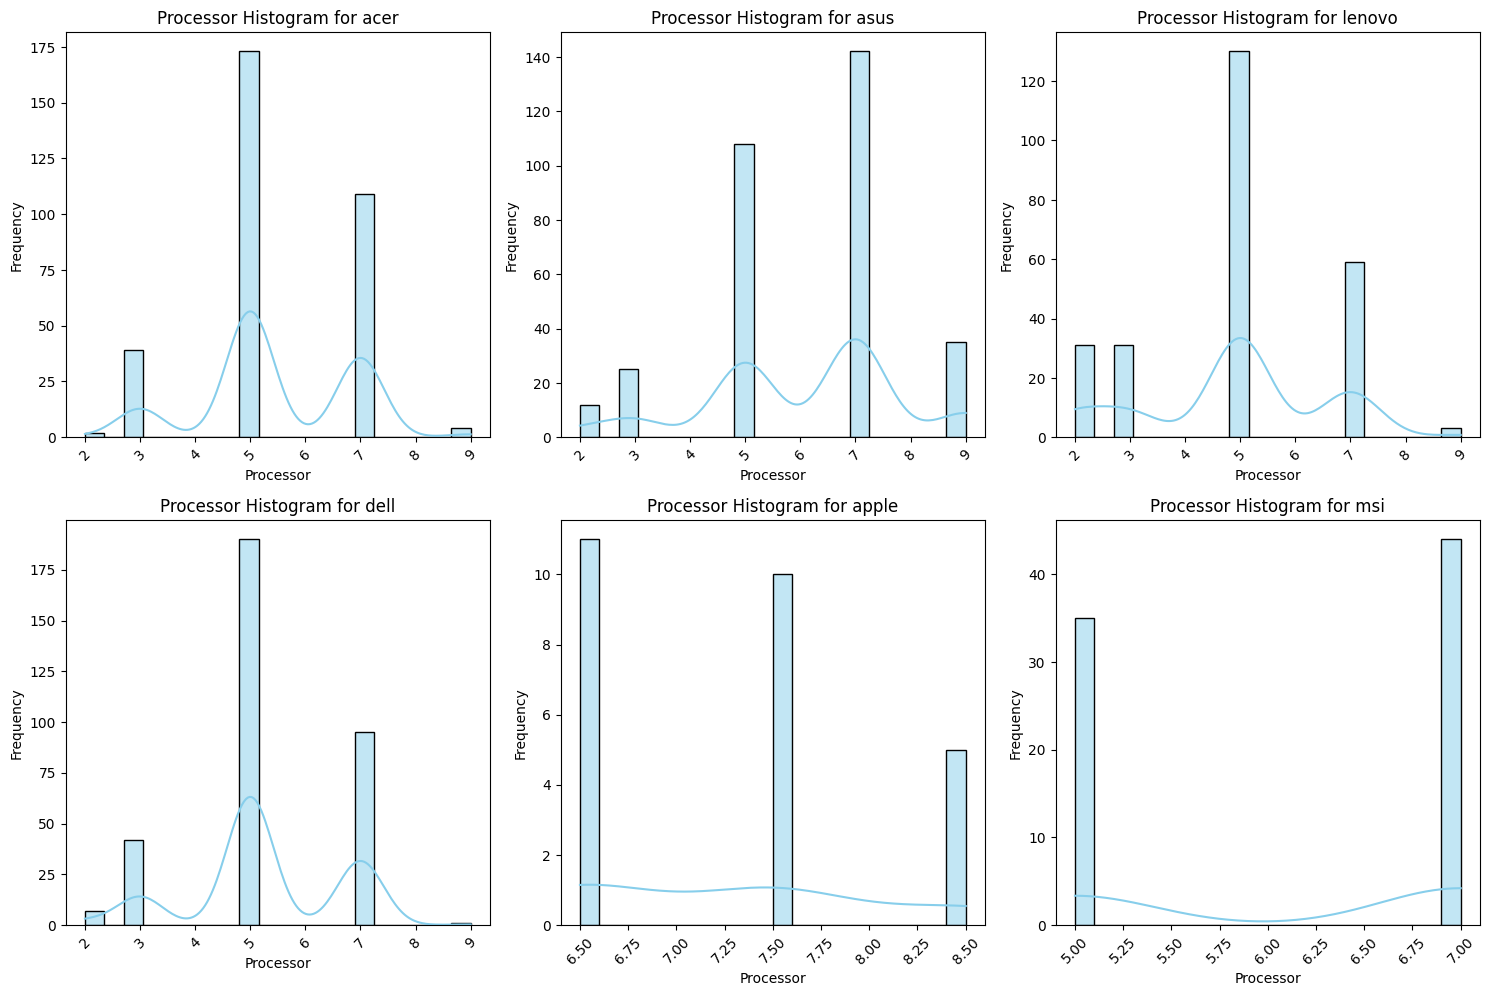

In [13]:
brands = ['acer', 'asus', 'lenovo', 'dell', 'apple', 'msi']

num_brands = len(brands)

cols_per_row = 3

num_rows = -(-num_brands // cols_per_row)  

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5 * num_rows))

axes = axes.flatten()

for i, brand in enumerate(brands):
    subset = laptop[laptop['brand'] == brand]
    sns.histplot(data=subset, x='processor', ax=axes[i], bins=20, color='skyblue', kde=True)
    axes[i].set_title(f'Processor Histogram for {brand}')
    axes[i].set_xlabel('Processor')
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(num_brands, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

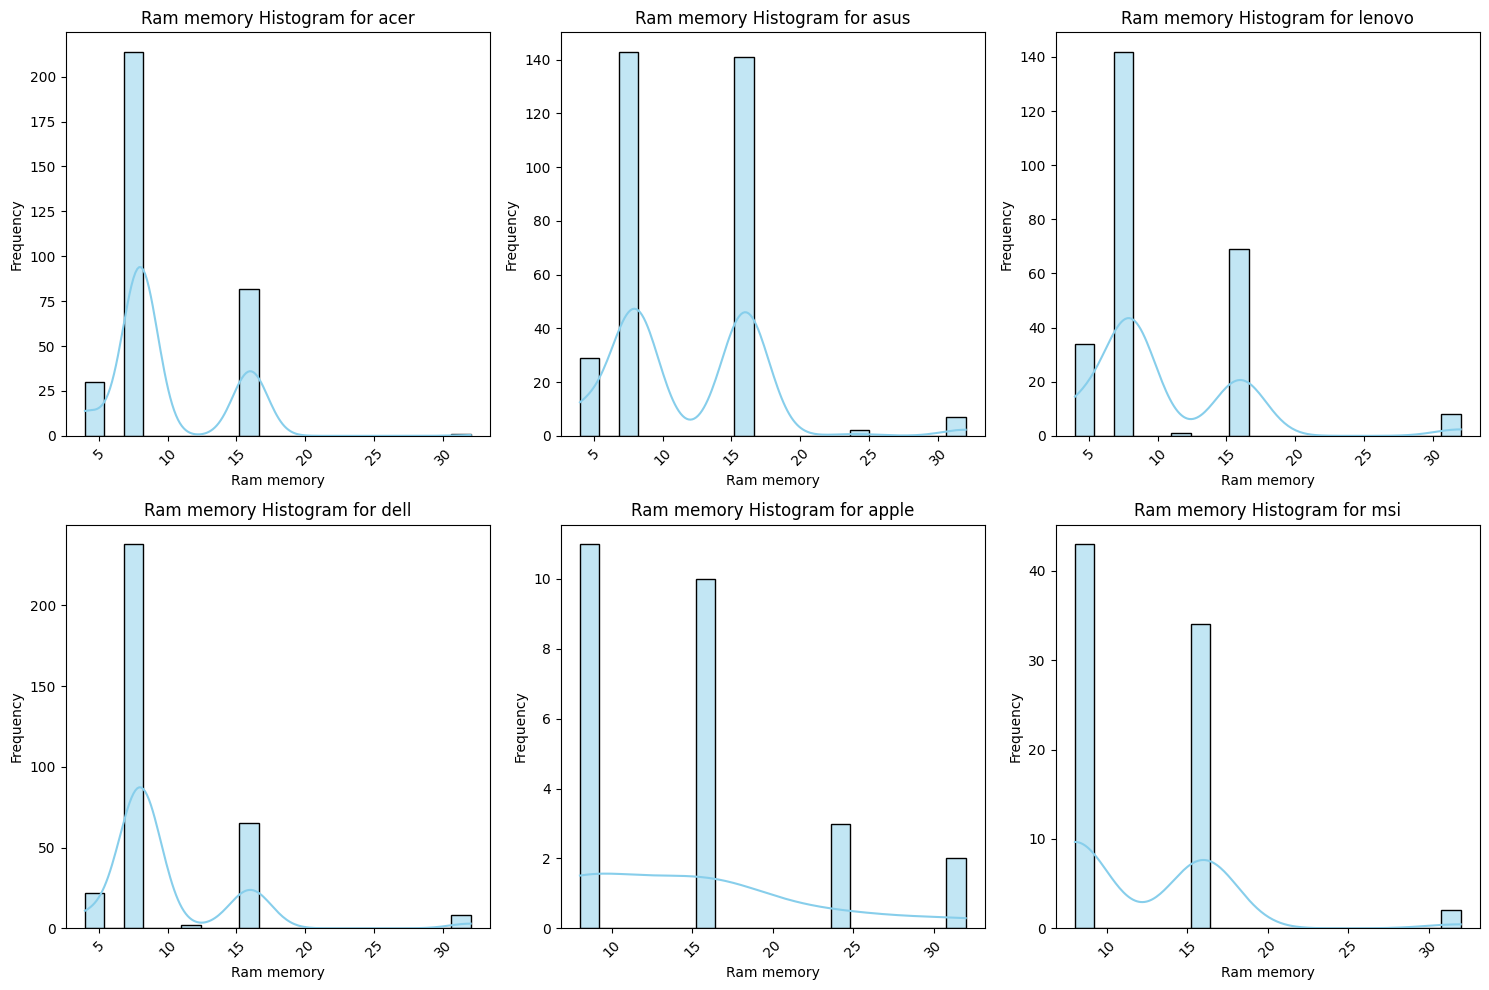

In [14]:
brands = ['acer', 'asus', 'lenovo', 'dell', 'apple', 'msi']

num_brands = len(brands)

cols_per_row = 3

num_rows = -(-num_brands // cols_per_row)  # Ceiling division

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5 * num_rows))

axes = axes.flatten()

for i, brand in enumerate(brands):
    subset = laptop[laptop['brand'] == brand]
    sns.histplot(data=subset, x='ram memory', ax=axes[i], bins=20, color='skyblue', kde=True)
    axes[i].set_title(f'Ram memory Histogram for {brand}')
    axes[i].set_xlabel('Ram memory')
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(num_brands, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

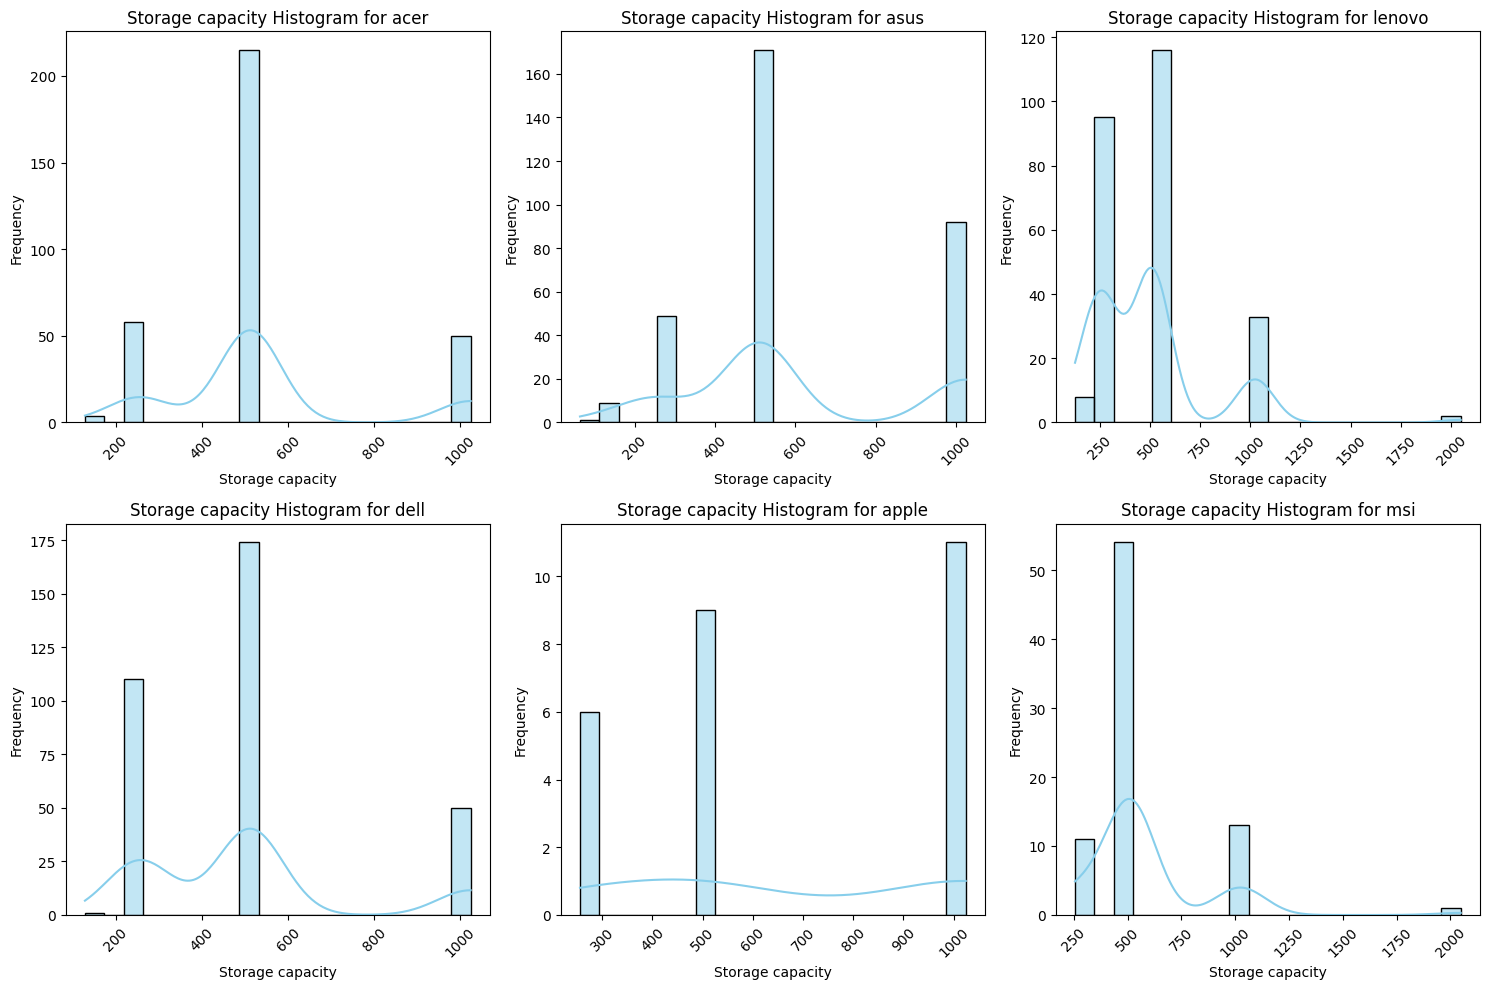

In [15]:
brands = ['acer', 'asus', 'lenovo', 'dell', 'apple', 'msi']


num_brands = len(brands)

cols_per_row = 3

num_rows = -(-num_brands // cols_per_row)  

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5 * num_rows))

axes = axes.flatten()

for i, brand in enumerate(brands):
    subset = laptop[laptop['brand'] == brand]
    sns.histplot(data=subset, x='storage capacity', ax=axes[i], bins=20, color='skyblue', kde=True)
    axes[i].set_title(f'Storage capacity Histogram for {brand}')
    axes[i].set_xlabel('Storage capacity')
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(num_brands, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

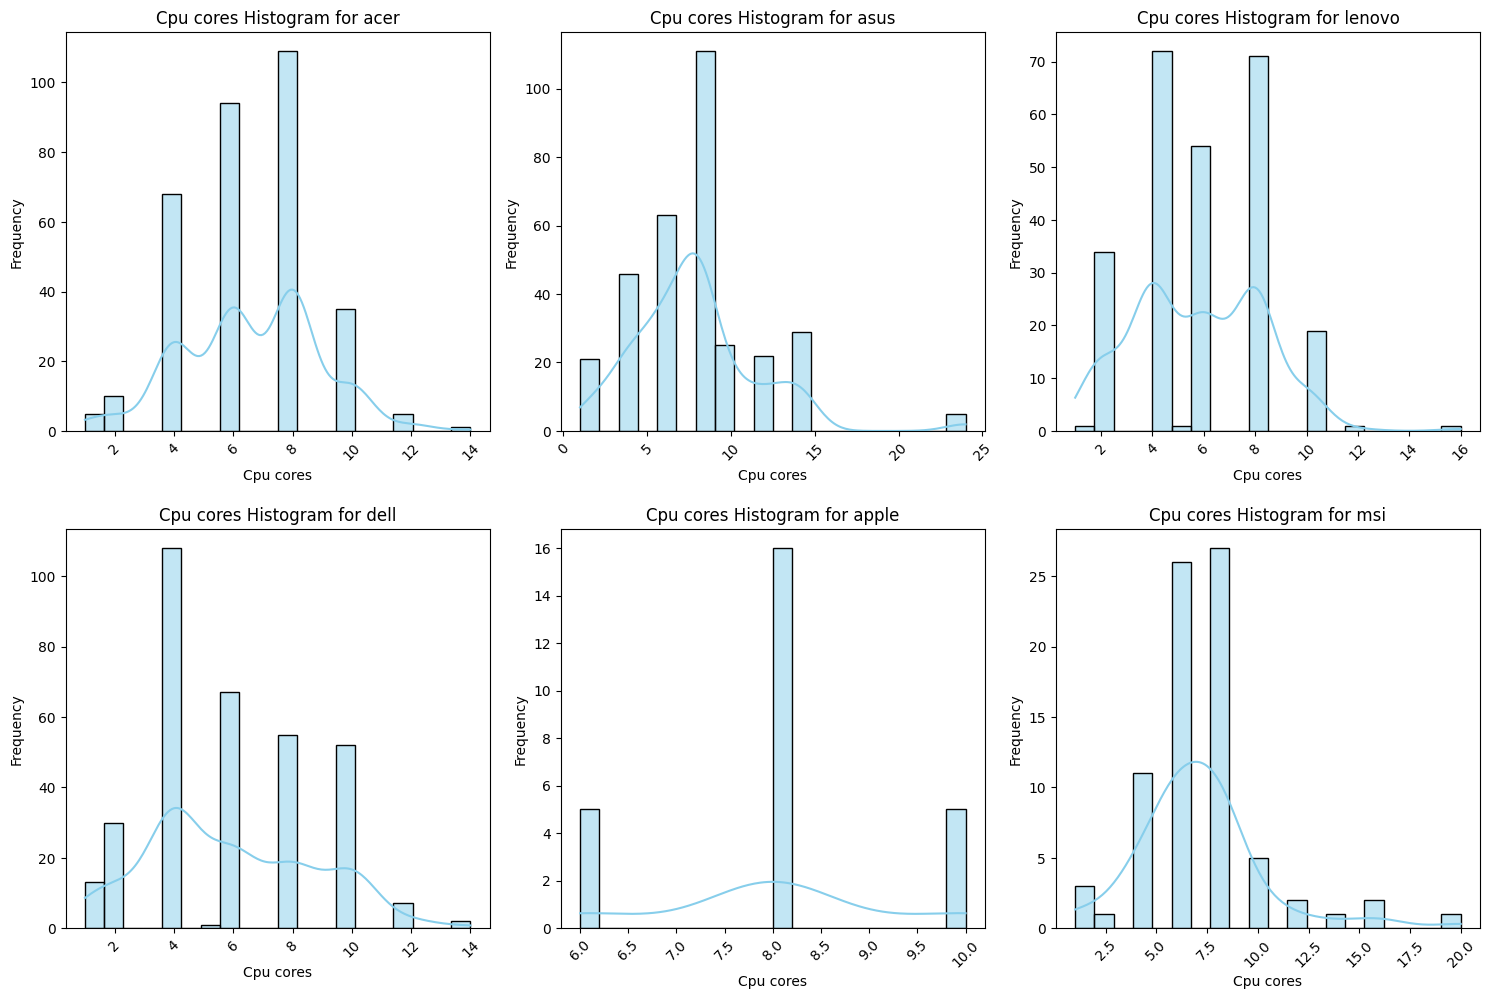

In [16]:
brands = ['acer', 'asus', 'lenovo', 'dell', 'apple', 'msi']


num_brands = len(brands)

cols_per_row = 3

num_rows = -(-num_brands // cols_per_row)  

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5 * num_rows))

axes = axes.flatten()

for i, brand in enumerate(brands):
    subset = laptop[laptop['brand'] == brand]
    sns.histplot(data=subset, x='cpu cores', ax=axes[i], bins=20, color='skyblue', kde=True)
    axes[i].set_title(f'Cpu cores Histogram for {brand}')
    axes[i].set_xlabel('Cpu cores')
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(num_brands, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

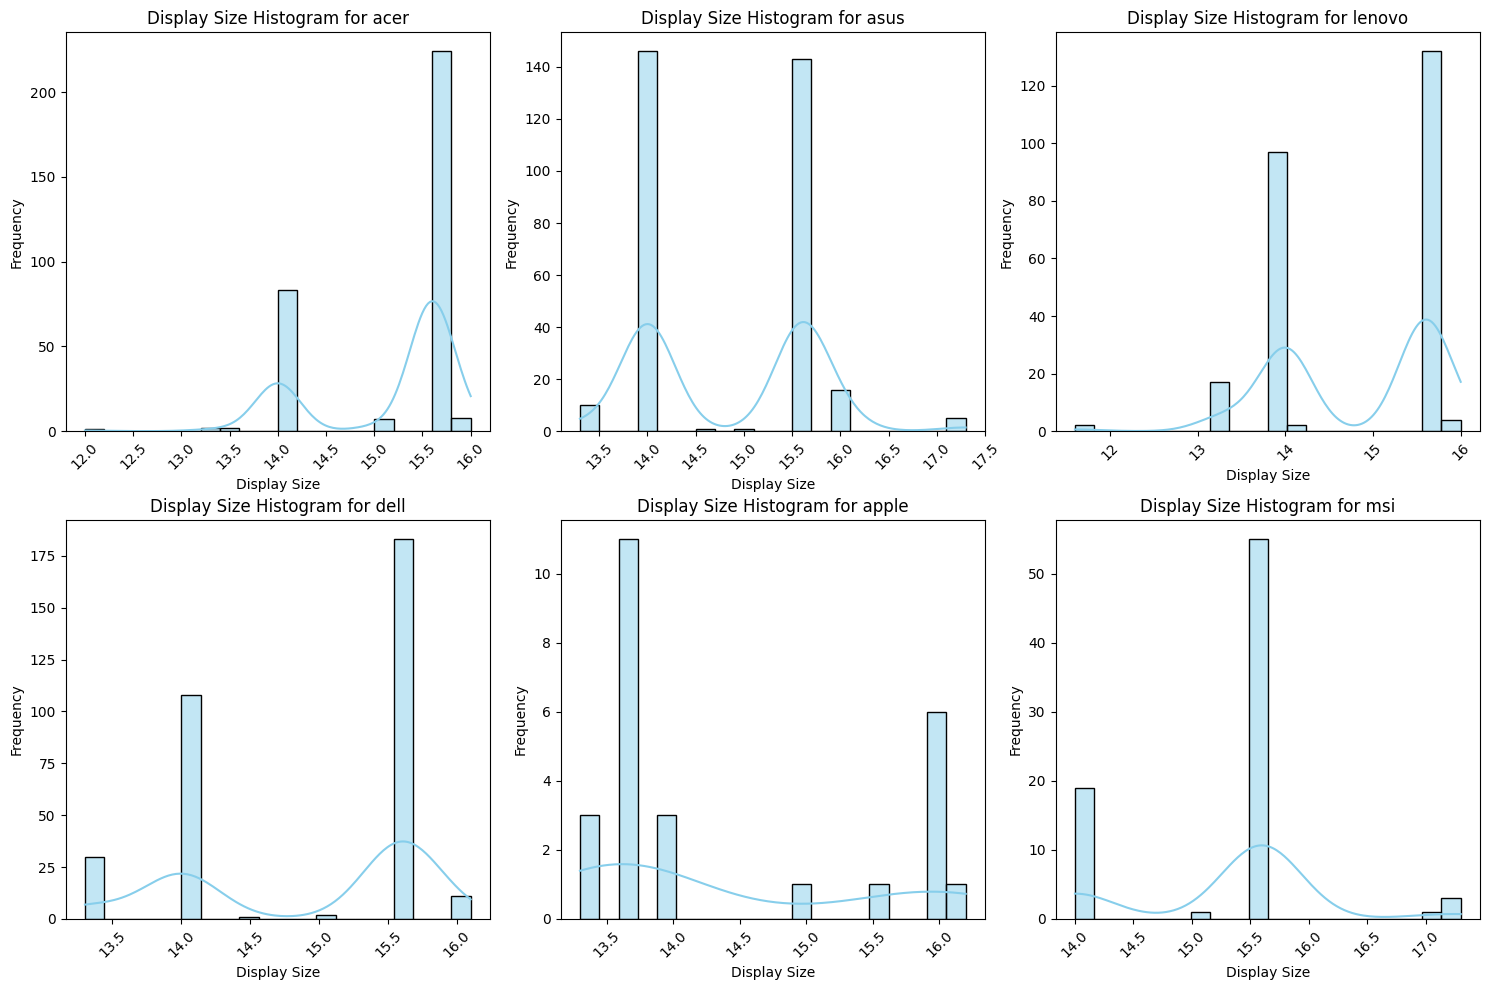

In [17]:
brands = ['acer', 'asus', 'lenovo', 'dell', 'apple', 'msi']


num_brands = len(brands)

cols_per_row = 3

num_rows = -(-num_brands // cols_per_row)  

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(15, 5 * num_rows))

axes = axes.flatten()

for i, brand in enumerate(brands):
    subset = laptop[laptop['brand'] == brand]
    sns.histplot(data=subset, x='display size', ax=axes[i], bins=20, color='skyblue', kde=True)
    axes[i].set_title(f'Display Size Histogram for {brand}')
    axes[i].set_xlabel('Display Size')
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=45)

for j in range(num_brands, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 2. What can we afford for every budget range?

In [18]:
# Define the price ranges
price_bins = [25000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 555555]
price_labels = ['25k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k-350k', '350k-400k', '400k-450k', '450k-500k', '500k-555k']

# Create a new column for the price categories
laptop['price_range'] = pd.cut(laptop['price'], bins=price_bins, labels=price_labels, right=False)

# Print the number of rows for each price range category
for label in price_labels:
    count = laptop[laptop['price_range'] == label].shape[0]
    print(f'Number of rows for price range {label}: {count}')

Number of rows for price range 25k-100k: 751
Number of rows for price range 100k-150k: 418
Number of rows for price range 150k-200k: 185
Number of rows for price range 200k-250k: 105
Number of rows for price range 250k-300k: 52
Number of rows for price range 300k-350k: 19
Number of rows for price range 350k-400k: 24
Number of rows for price range 400k-450k: 3
Number of rows for price range 450k-500k: 3
Number of rows for price range 500k-555k: 2


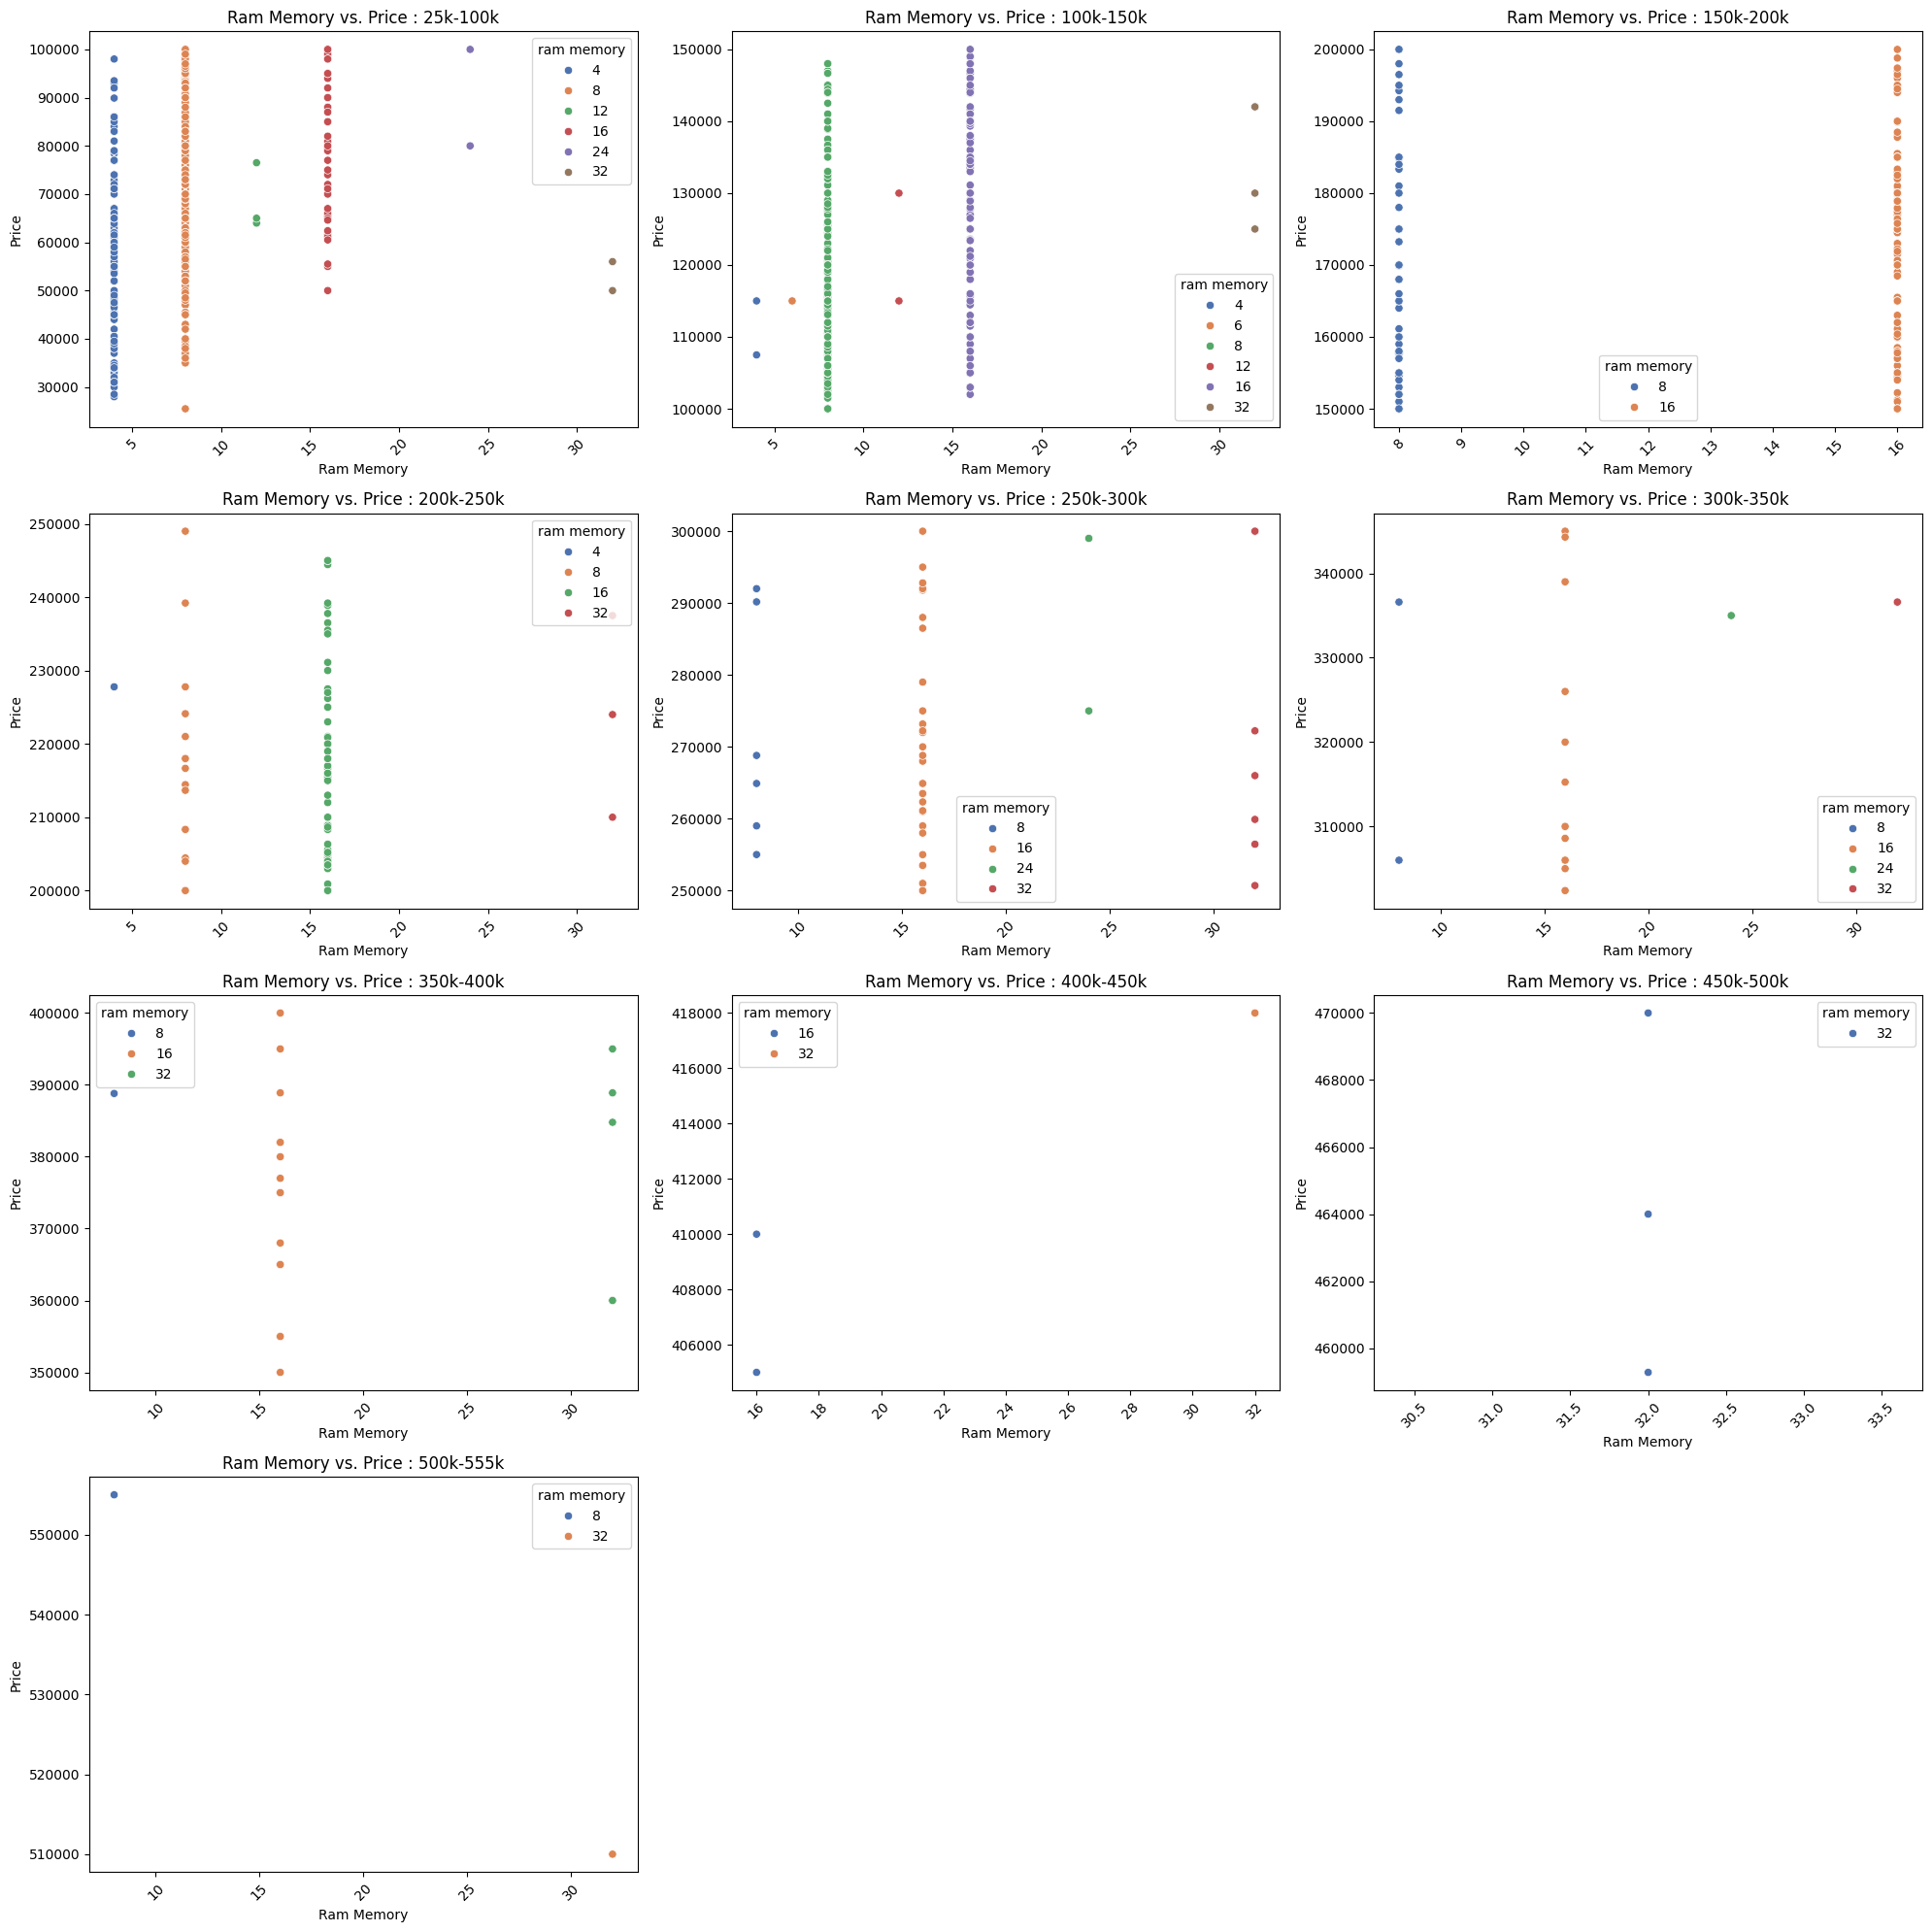

In [19]:
# Number of price categories
num_price_ranges = len(price_labels)

# Number of columns per row
cols_per_row = 3

# Number of rows needed
num_rows = int(np.ceil(num_price_ranges / cols_per_row))

# Create subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot scatter plots for each price range category
for i, label in enumerate(price_labels):
    subset = laptop[laptop['price_range'] == label]
    if not subset.empty:
        sns.scatterplot(data=subset, x='ram memory', y='price', ax=axes[i], hue='ram memory', palette='deep')
        axes[i].set_title(f'Ram Memory vs. Price : {label}')
        axes[i].set_xlabel('Ram Memory')
        axes[i].set_ylabel('Price')
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    else:
        fig.delaxes(axes[i])

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

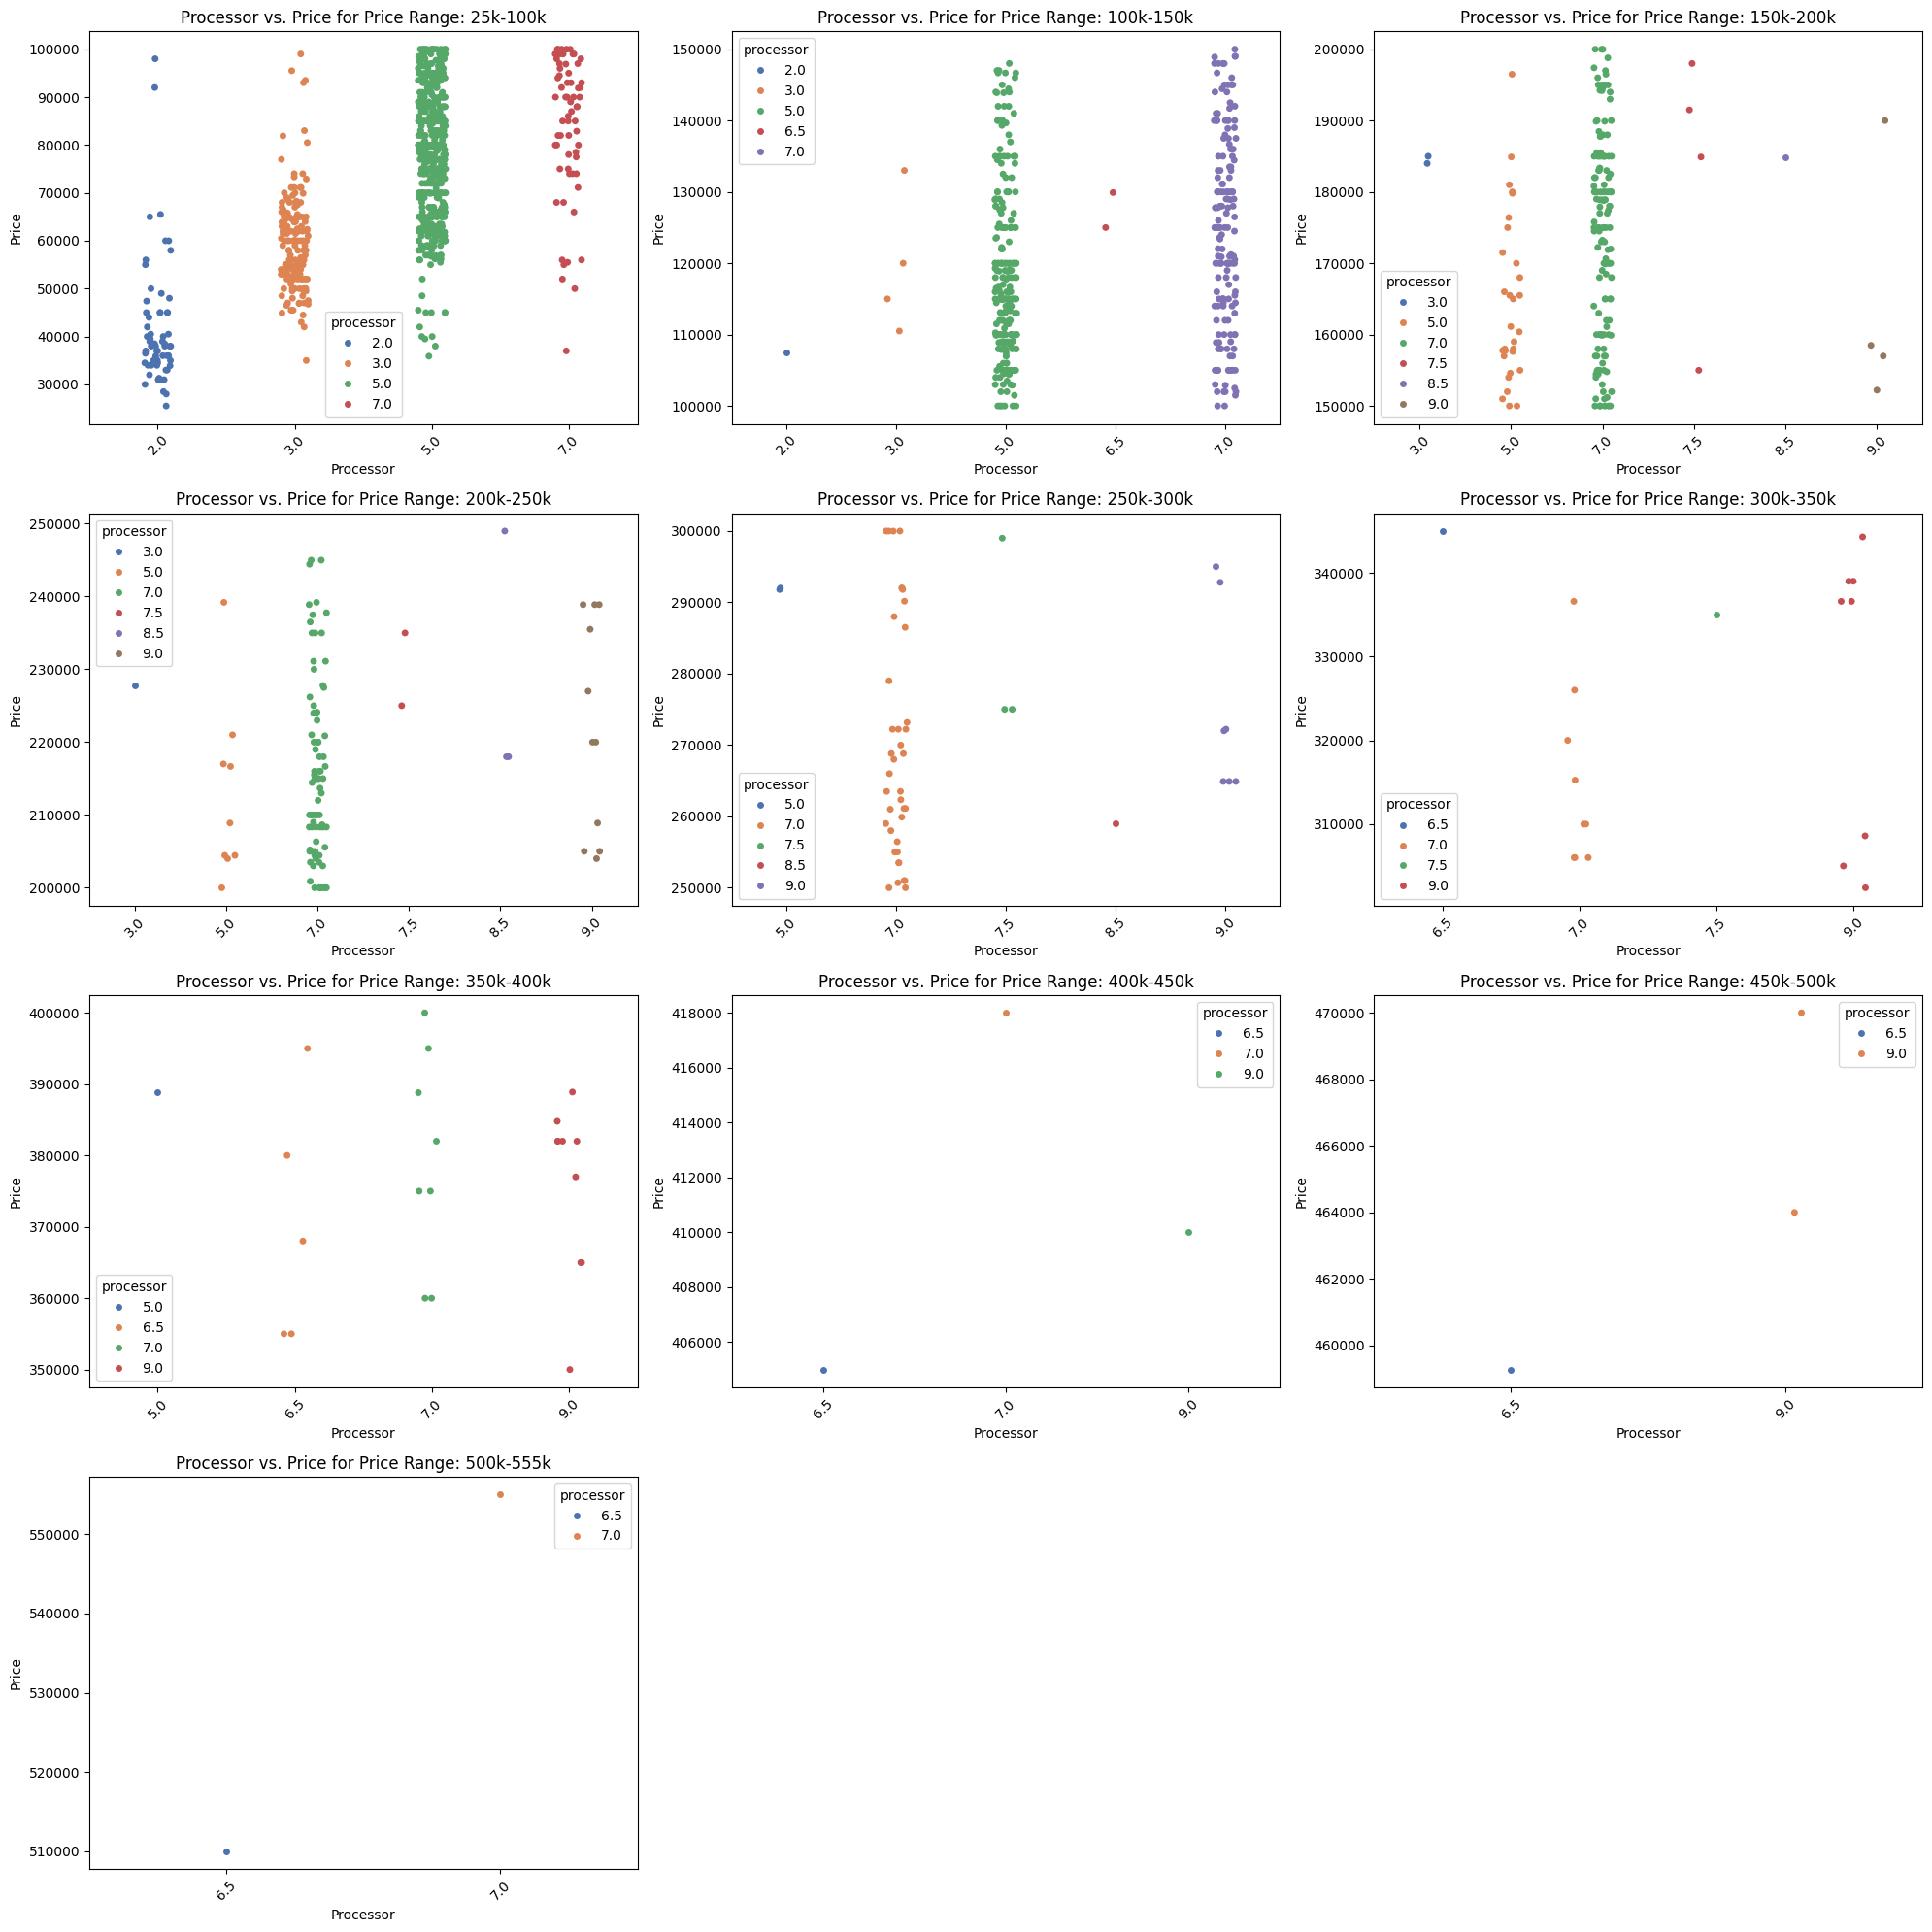

In [20]:
# Number of columns per row
cols_per_row = 3

# Number of rows needed
num_rows = int(np.ceil(num_price_ranges / cols_per_row))

# Create subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot scatter plots for each price range category
for i, label in enumerate(price_labels):
    subset = laptop[laptop['price_range'] == label]
    if not subset.empty:
        sns.stripplot(data=subset, x='processor', y='price', ax=axes[i], hue='processor', palette='deep')
        axes[i].set_title(f'Processor vs. Price for Price Range: {label}')
        axes[i].set_xlabel('Processor')
        axes[i].set_ylabel('Price')
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    else:
        fig.delaxes(axes[i])

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

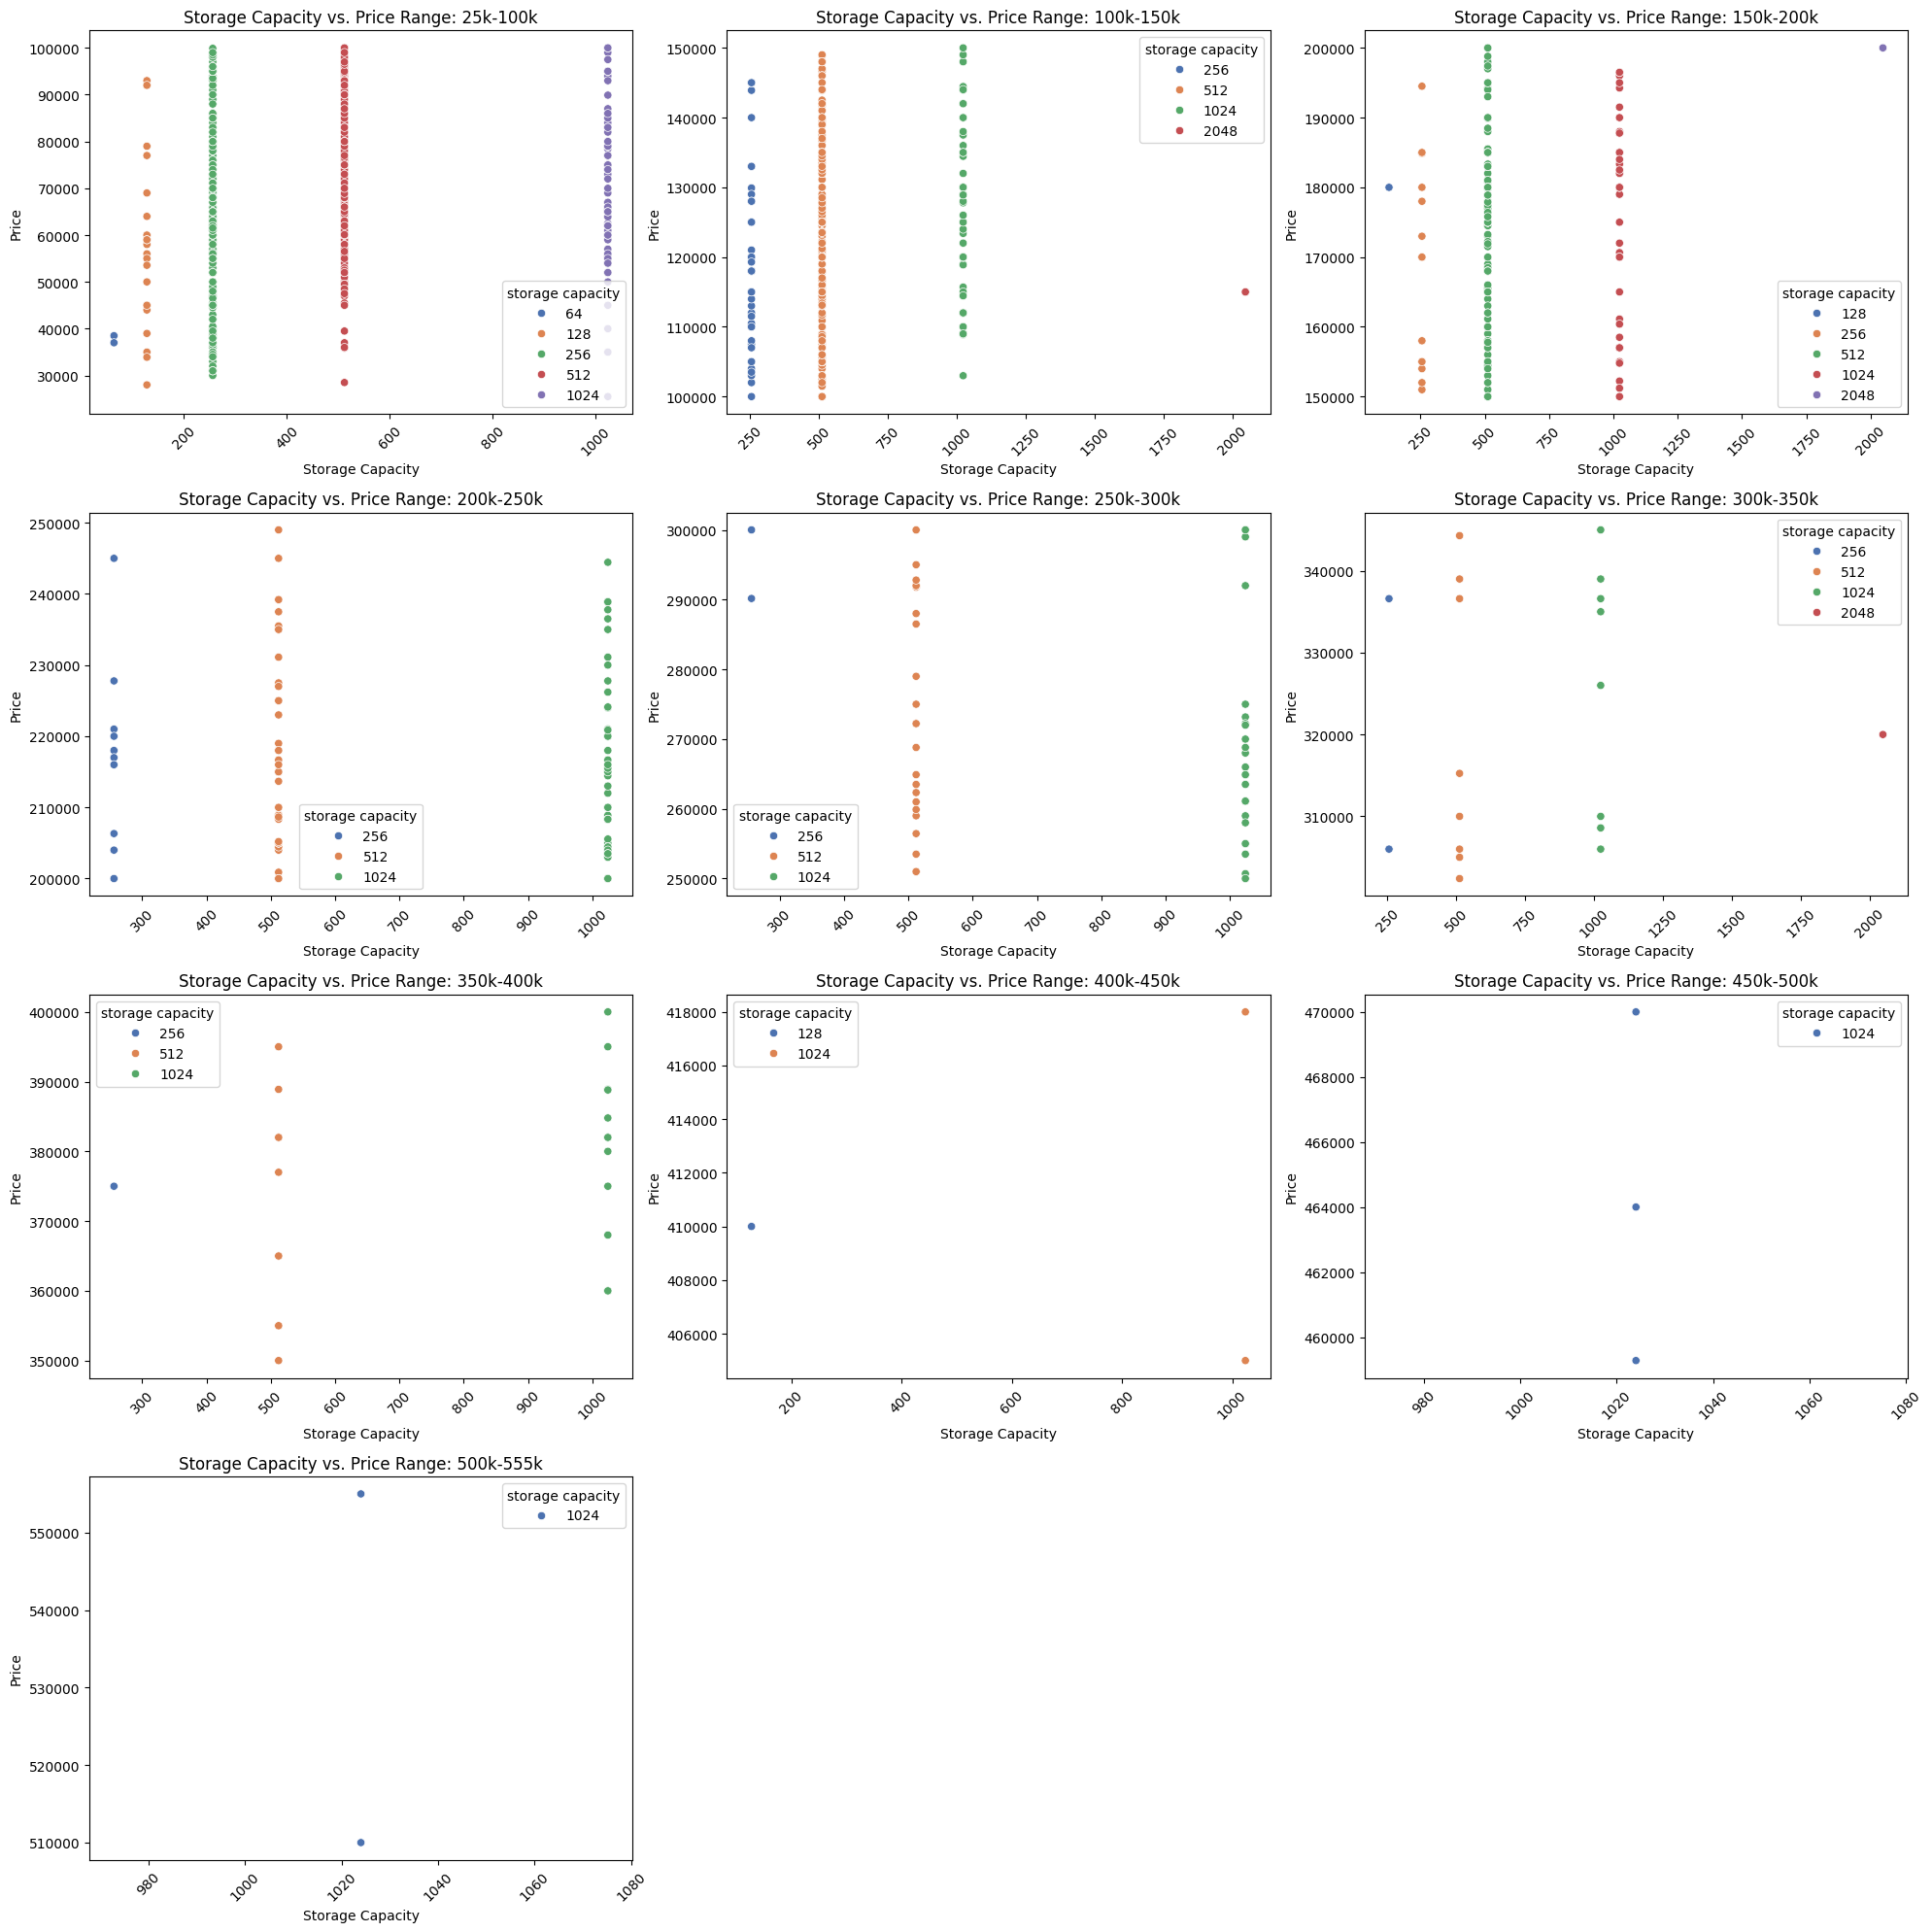

In [21]:
# Number of columns per row
cols_per_row = 3

# Number of rows needed
num_rows = int(np.ceil(num_price_ranges / cols_per_row))

# Create subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot scatter plots for each price range category
for i, label in enumerate(price_labels):
    subset = laptop[laptop['price_range'] == label]
    if not subset.empty:
        sns.scatterplot(data=subset, x='storage capacity', y='price', ax=axes[i], hue='storage capacity', palette='deep')
        axes[i].set_title(f'Storage Capacity vs. Price Range: {label}')
        axes[i].set_xlabel('Storage Capacity')
        axes[i].set_ylabel('Price')
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    else:
        fig.delaxes(axes[i])

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

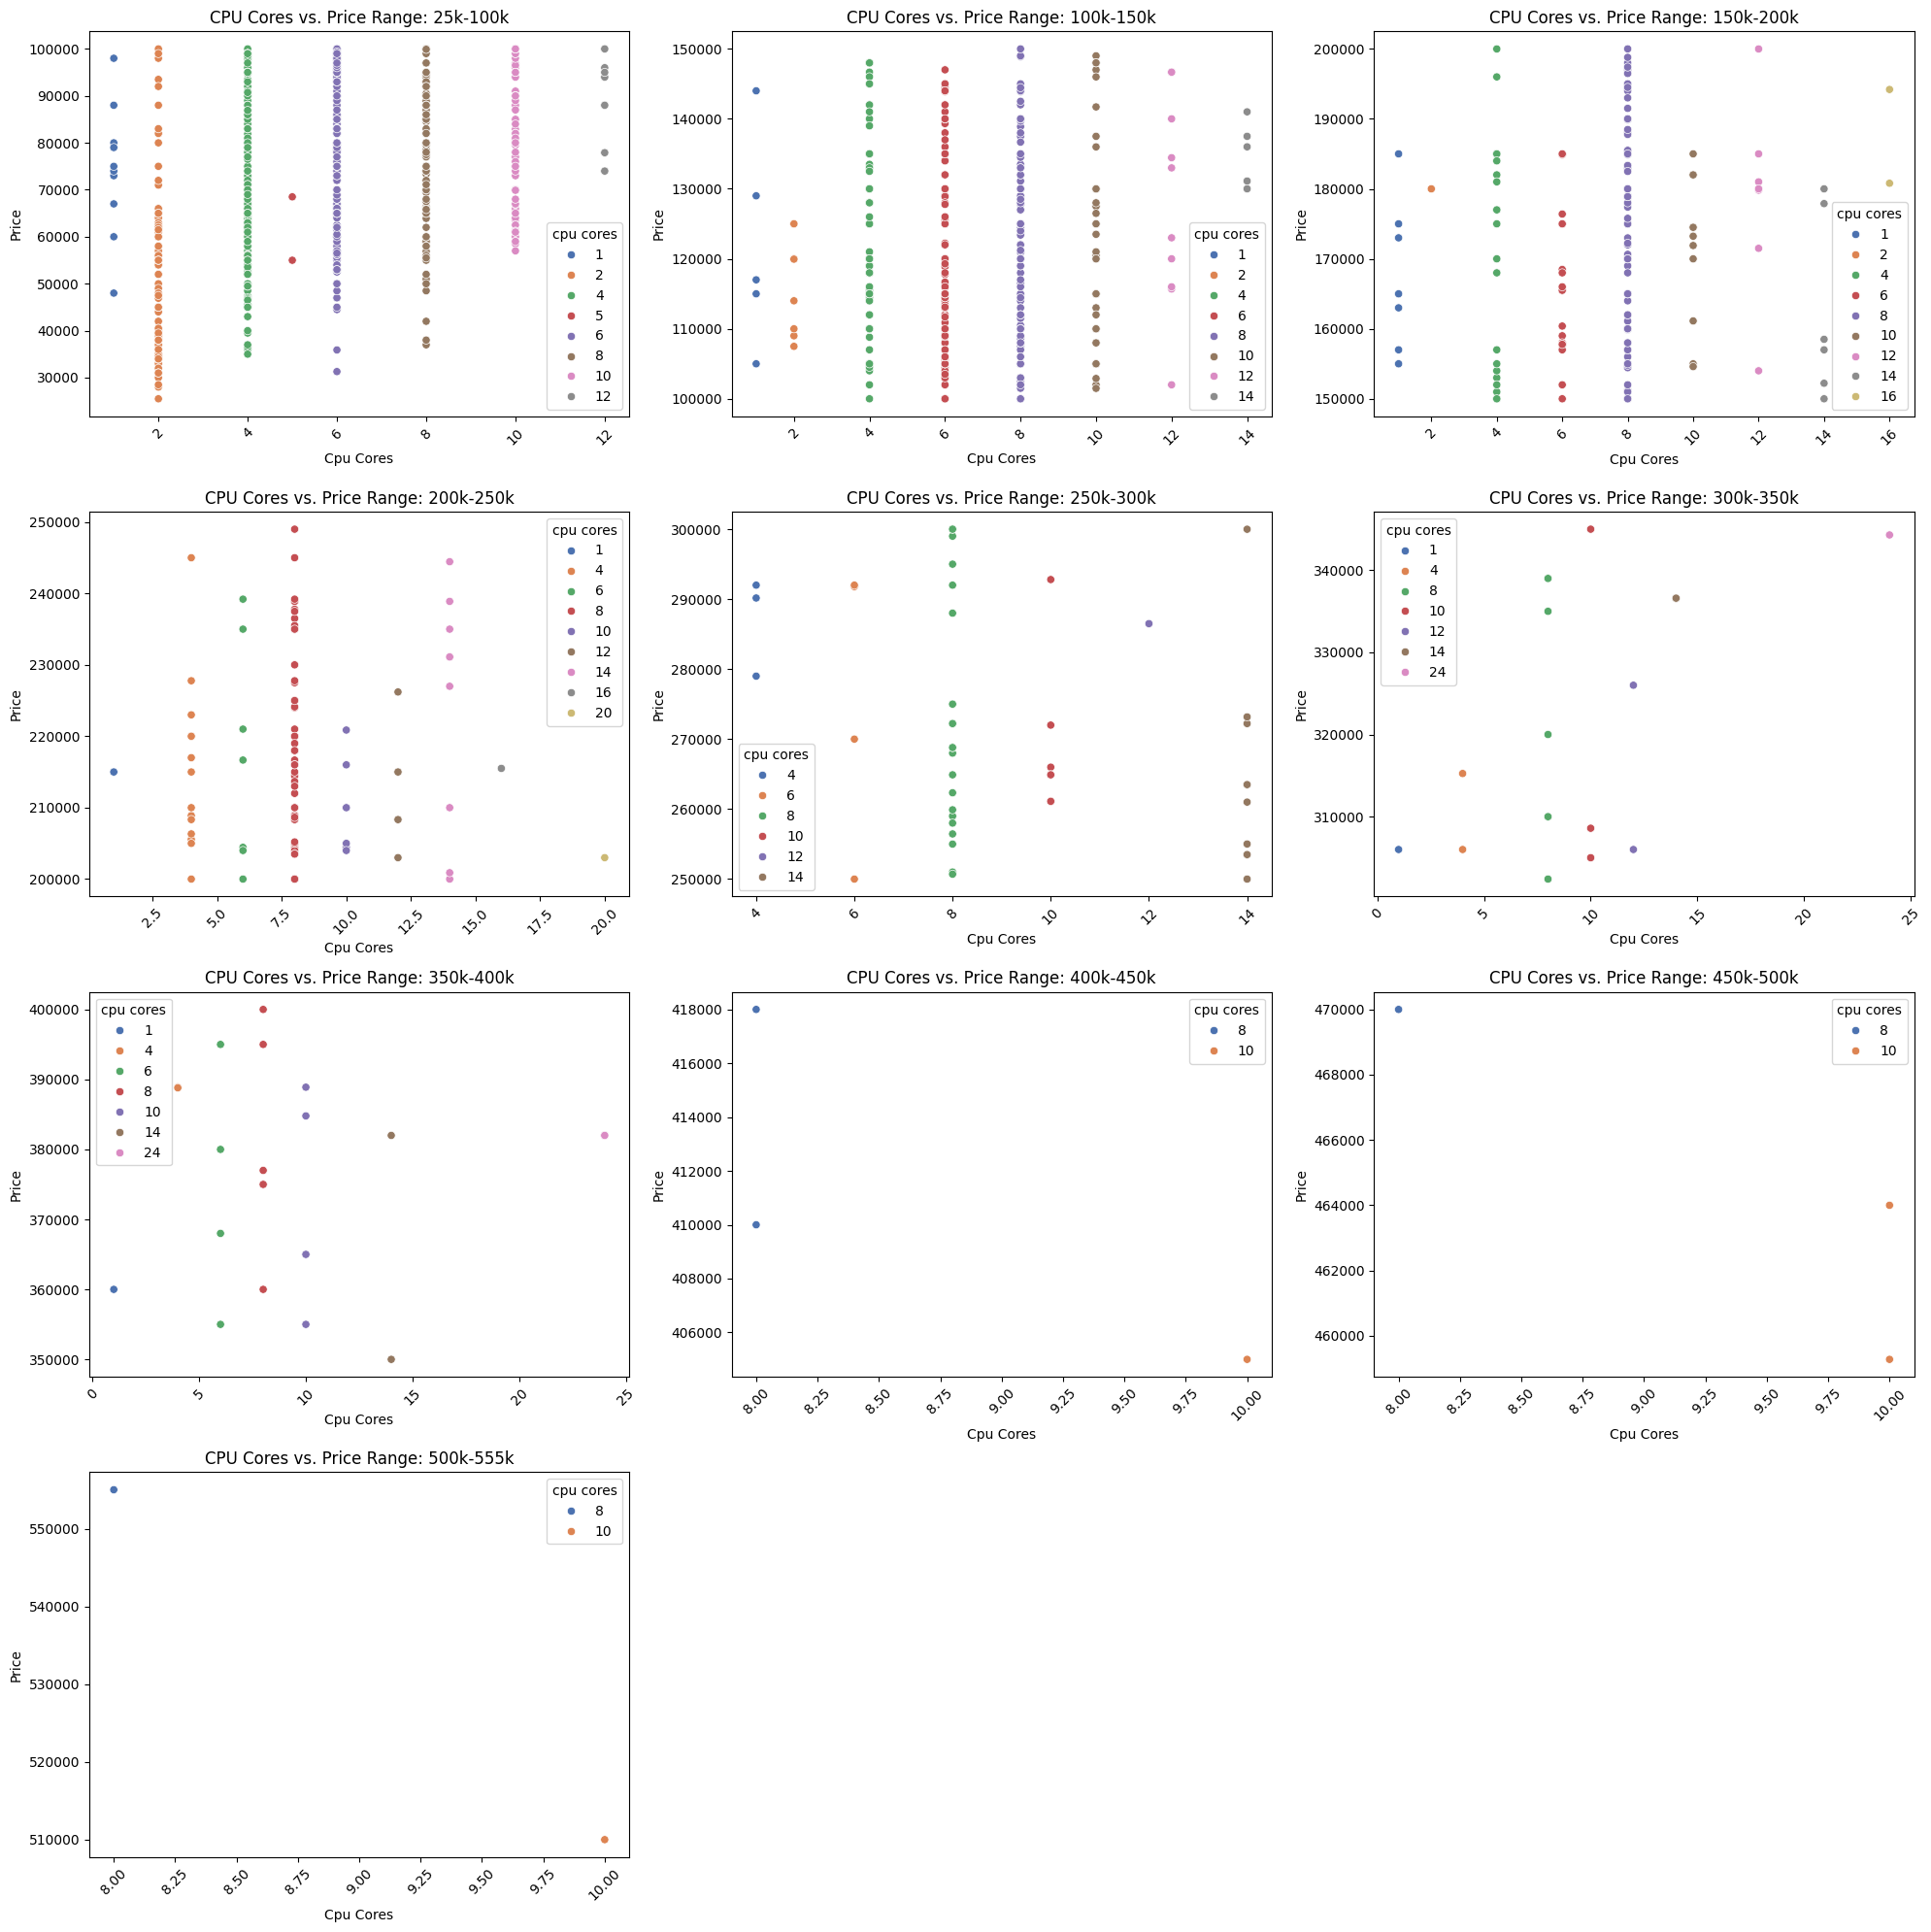

In [22]:
# Number of columns per row
cols_per_row = 3

# Number of rows needed
num_rows = int(np.ceil(num_price_ranges / cols_per_row))

# Create subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot scatter plots for each price range category
for i, label in enumerate(price_labels):
    subset = laptop[laptop['price_range'] == label]
    if not subset.empty:
        sns.scatterplot(data=subset, x='cpu cores', y='price', ax=axes[i], hue='cpu cores', palette='deep')
        axes[i].set_title(f'CPU Cores vs. Price Range: {label}')
        axes[i].set_xlabel('Cpu Cores')
        axes[i].set_ylabel('Price')
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    else:
        fig.delaxes(axes[i])

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

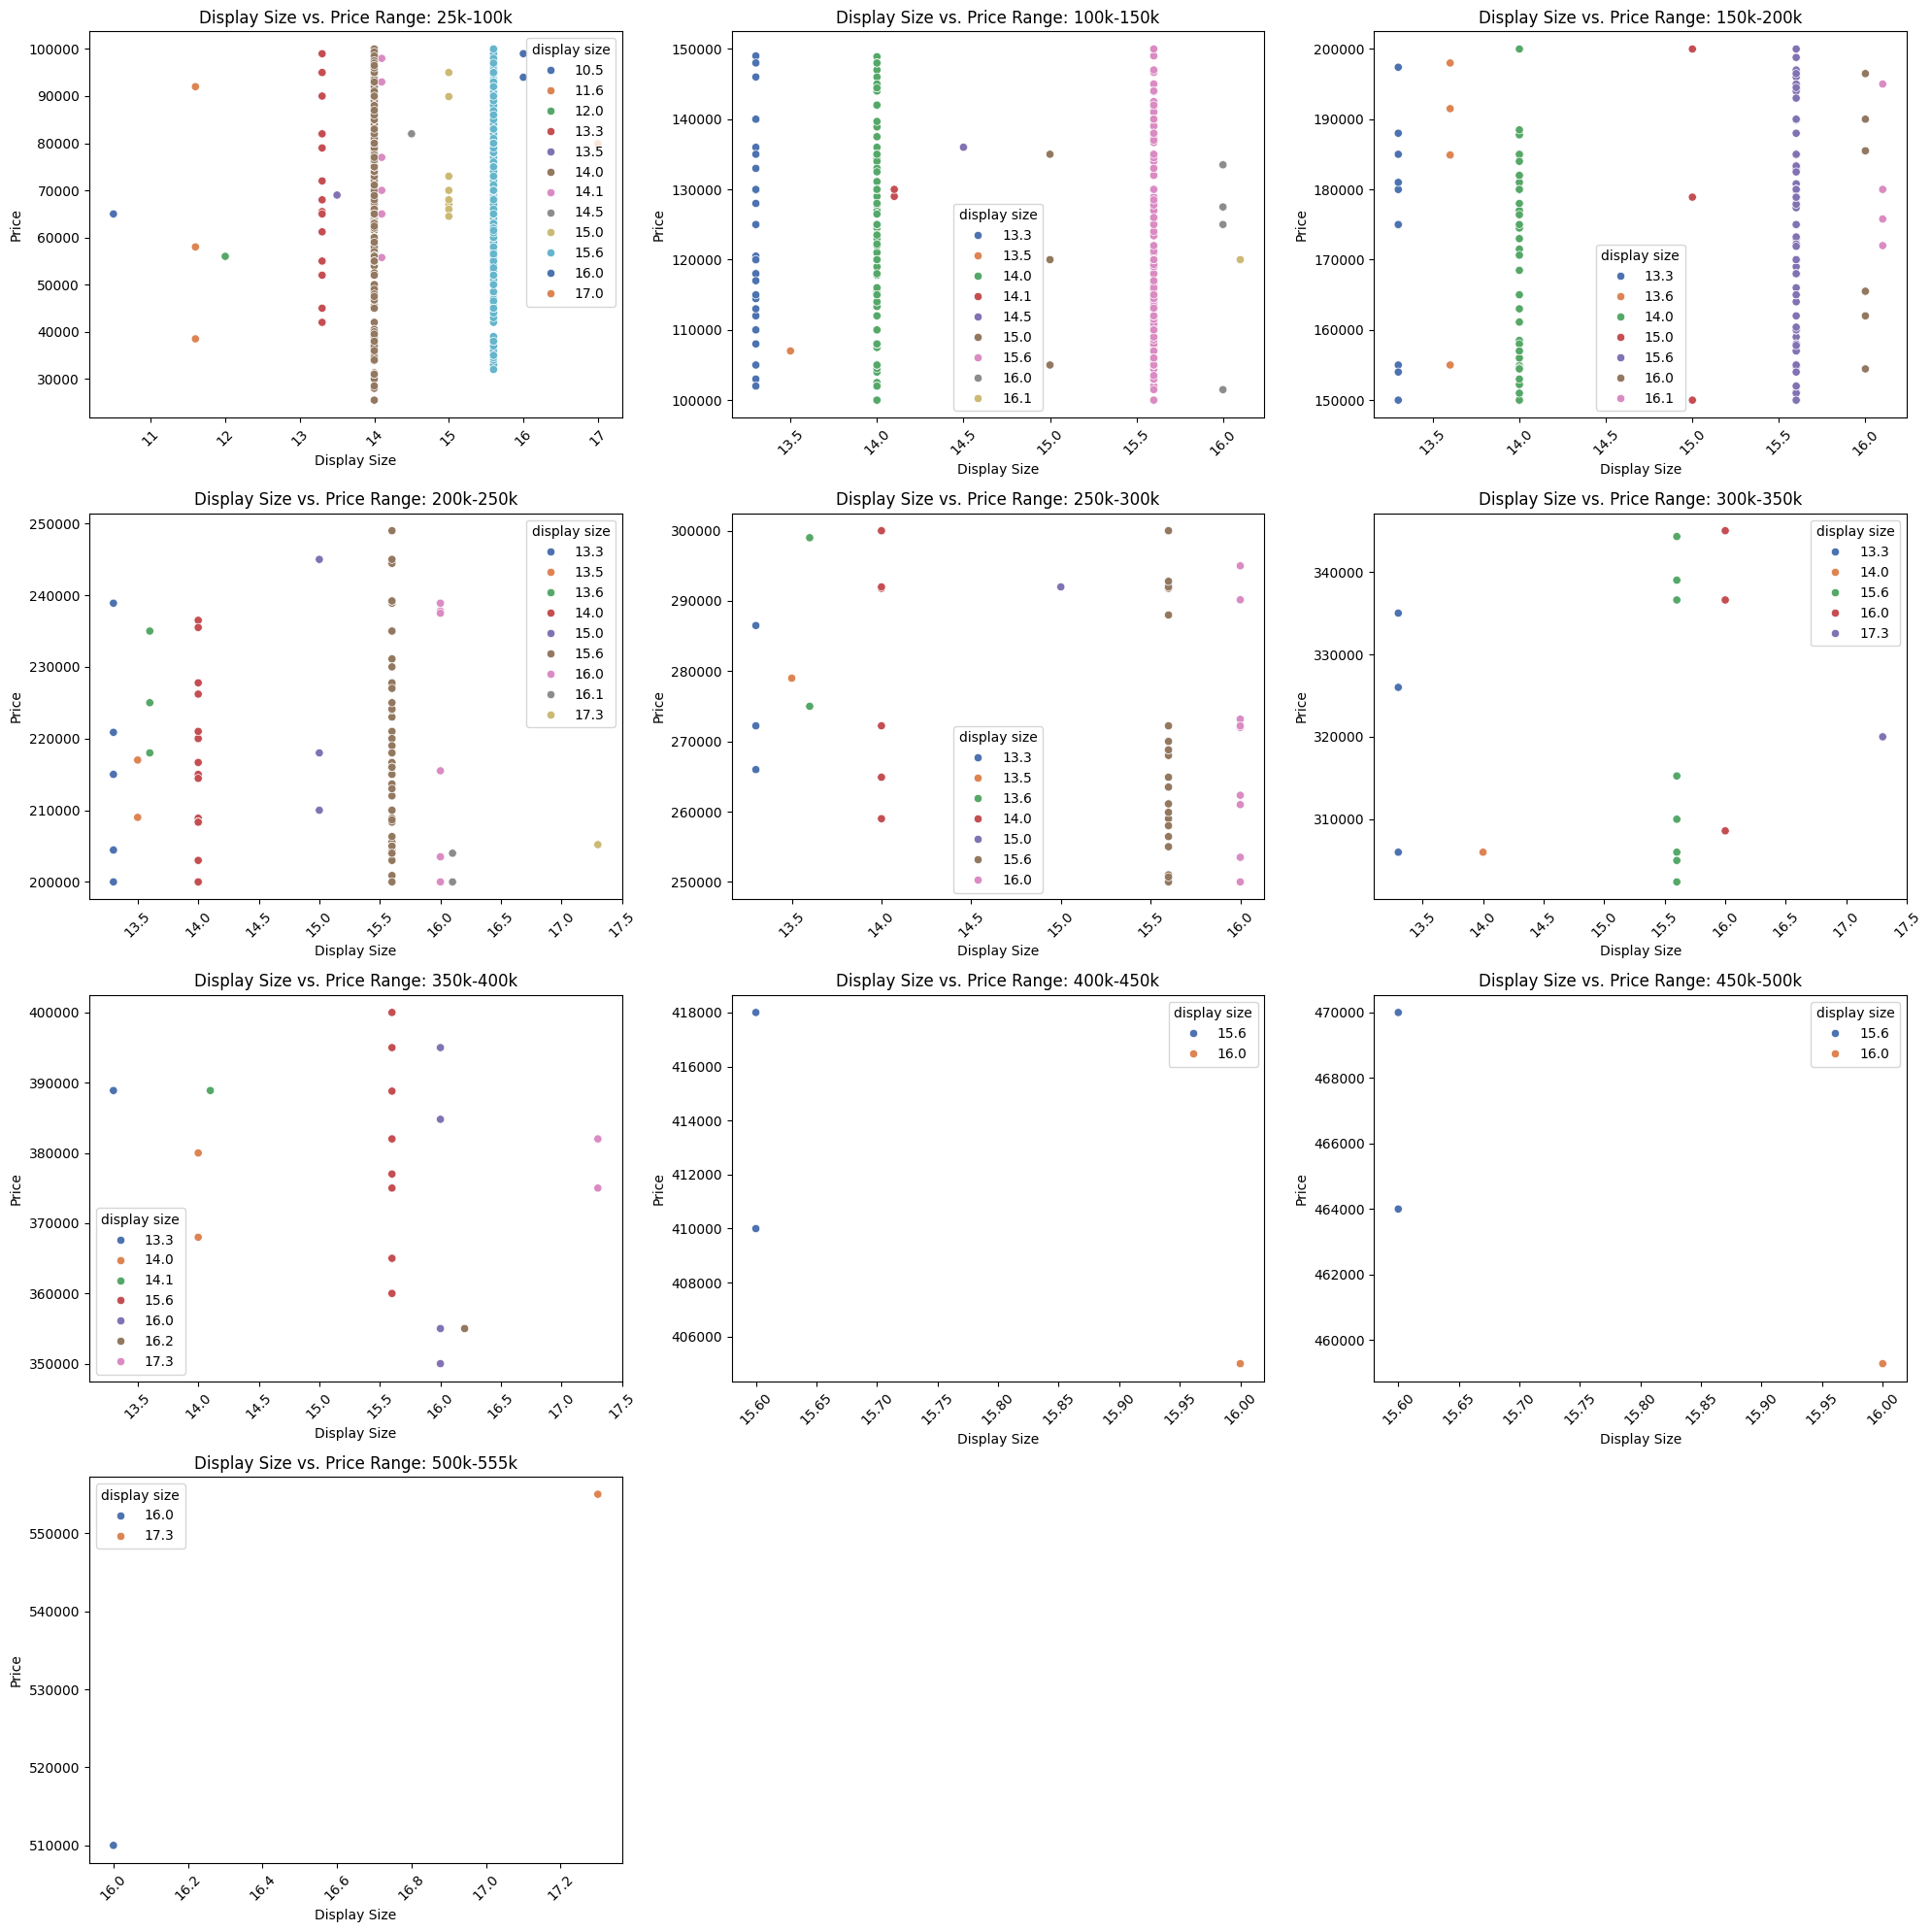

In [23]:
# Number of columns per row
cols_per_row = 3

# Number of rows needed
num_rows = int(np.ceil(num_price_ranges / cols_per_row))

# Create subplots
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(20, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot scatter plots for each price range category
for i, label in enumerate(price_labels):
    subset = laptop[laptop['price_range'] == label]
    if not subset.empty:
        sns.scatterplot(data=subset, x='display size', y='price', ax=axes[i], hue='display size', palette='deep')
        axes[i].set_title(f'Display Size vs. Price Range: {label}')
        axes[i].set_xlabel('Display Size')
        axes[i].set_ylabel('Price')
        axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability
    else:
        fig.delaxes(axes[i])

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


### 3. What Attribute has the most affect in price?

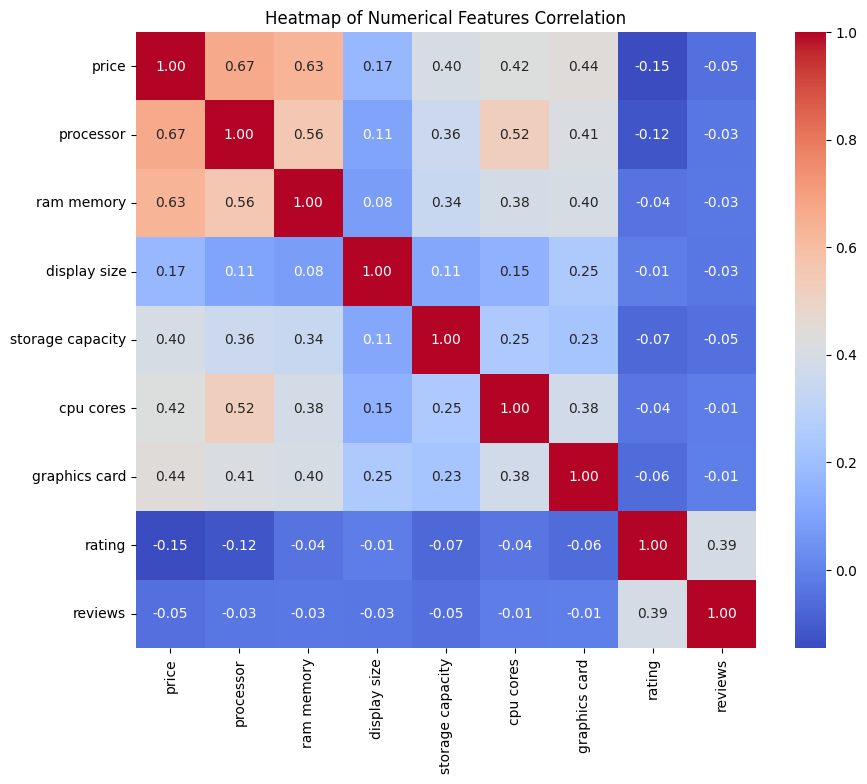

In [24]:
# Heatmap
# Create a DataFrame with only the numerical columns
COLS = ['price', 'processor', 'ram memory', 'display size', 'storage capacity', 'cpu cores', 'graphics card', 'rating', 'reviews']
numerical_data = laptop[COLS]
# Calculate the correlation matrix
corr_matrix = numerical_data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Features Correlation')
plt.show()

### 4. After what price range should you ask yourself maybe a laptop is not enough for me?


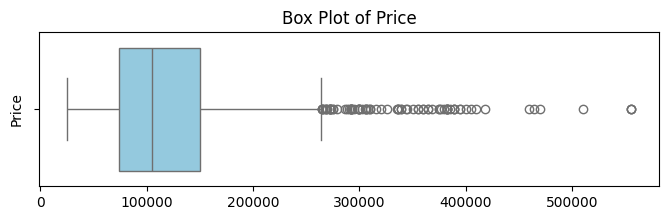

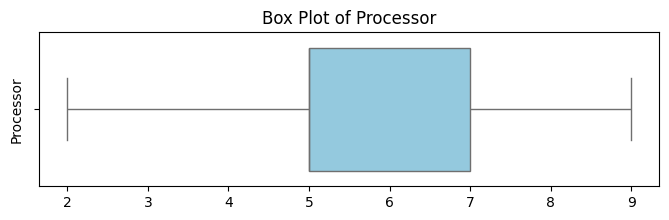

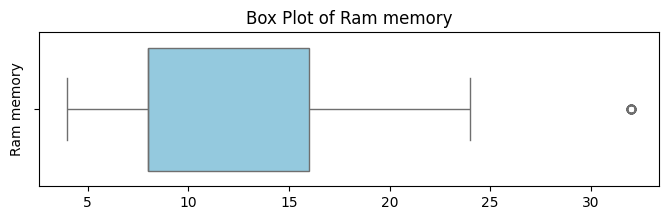

In [25]:
# Loop through each column and create a box plot
cols = ['price', 'processor', 'ram memory']
for col in cols:
    plt.figure(figsize=(8, 2))
    sns.boxplot(data=laptop, x=col, color='skyblue')
    plt.title(f'Box Plot of {col.capitalize()}')
    plt.xlabel('')  # No need for x label as it's a single variable plot
    plt.ylabel(col.capitalize())
    plt.show()


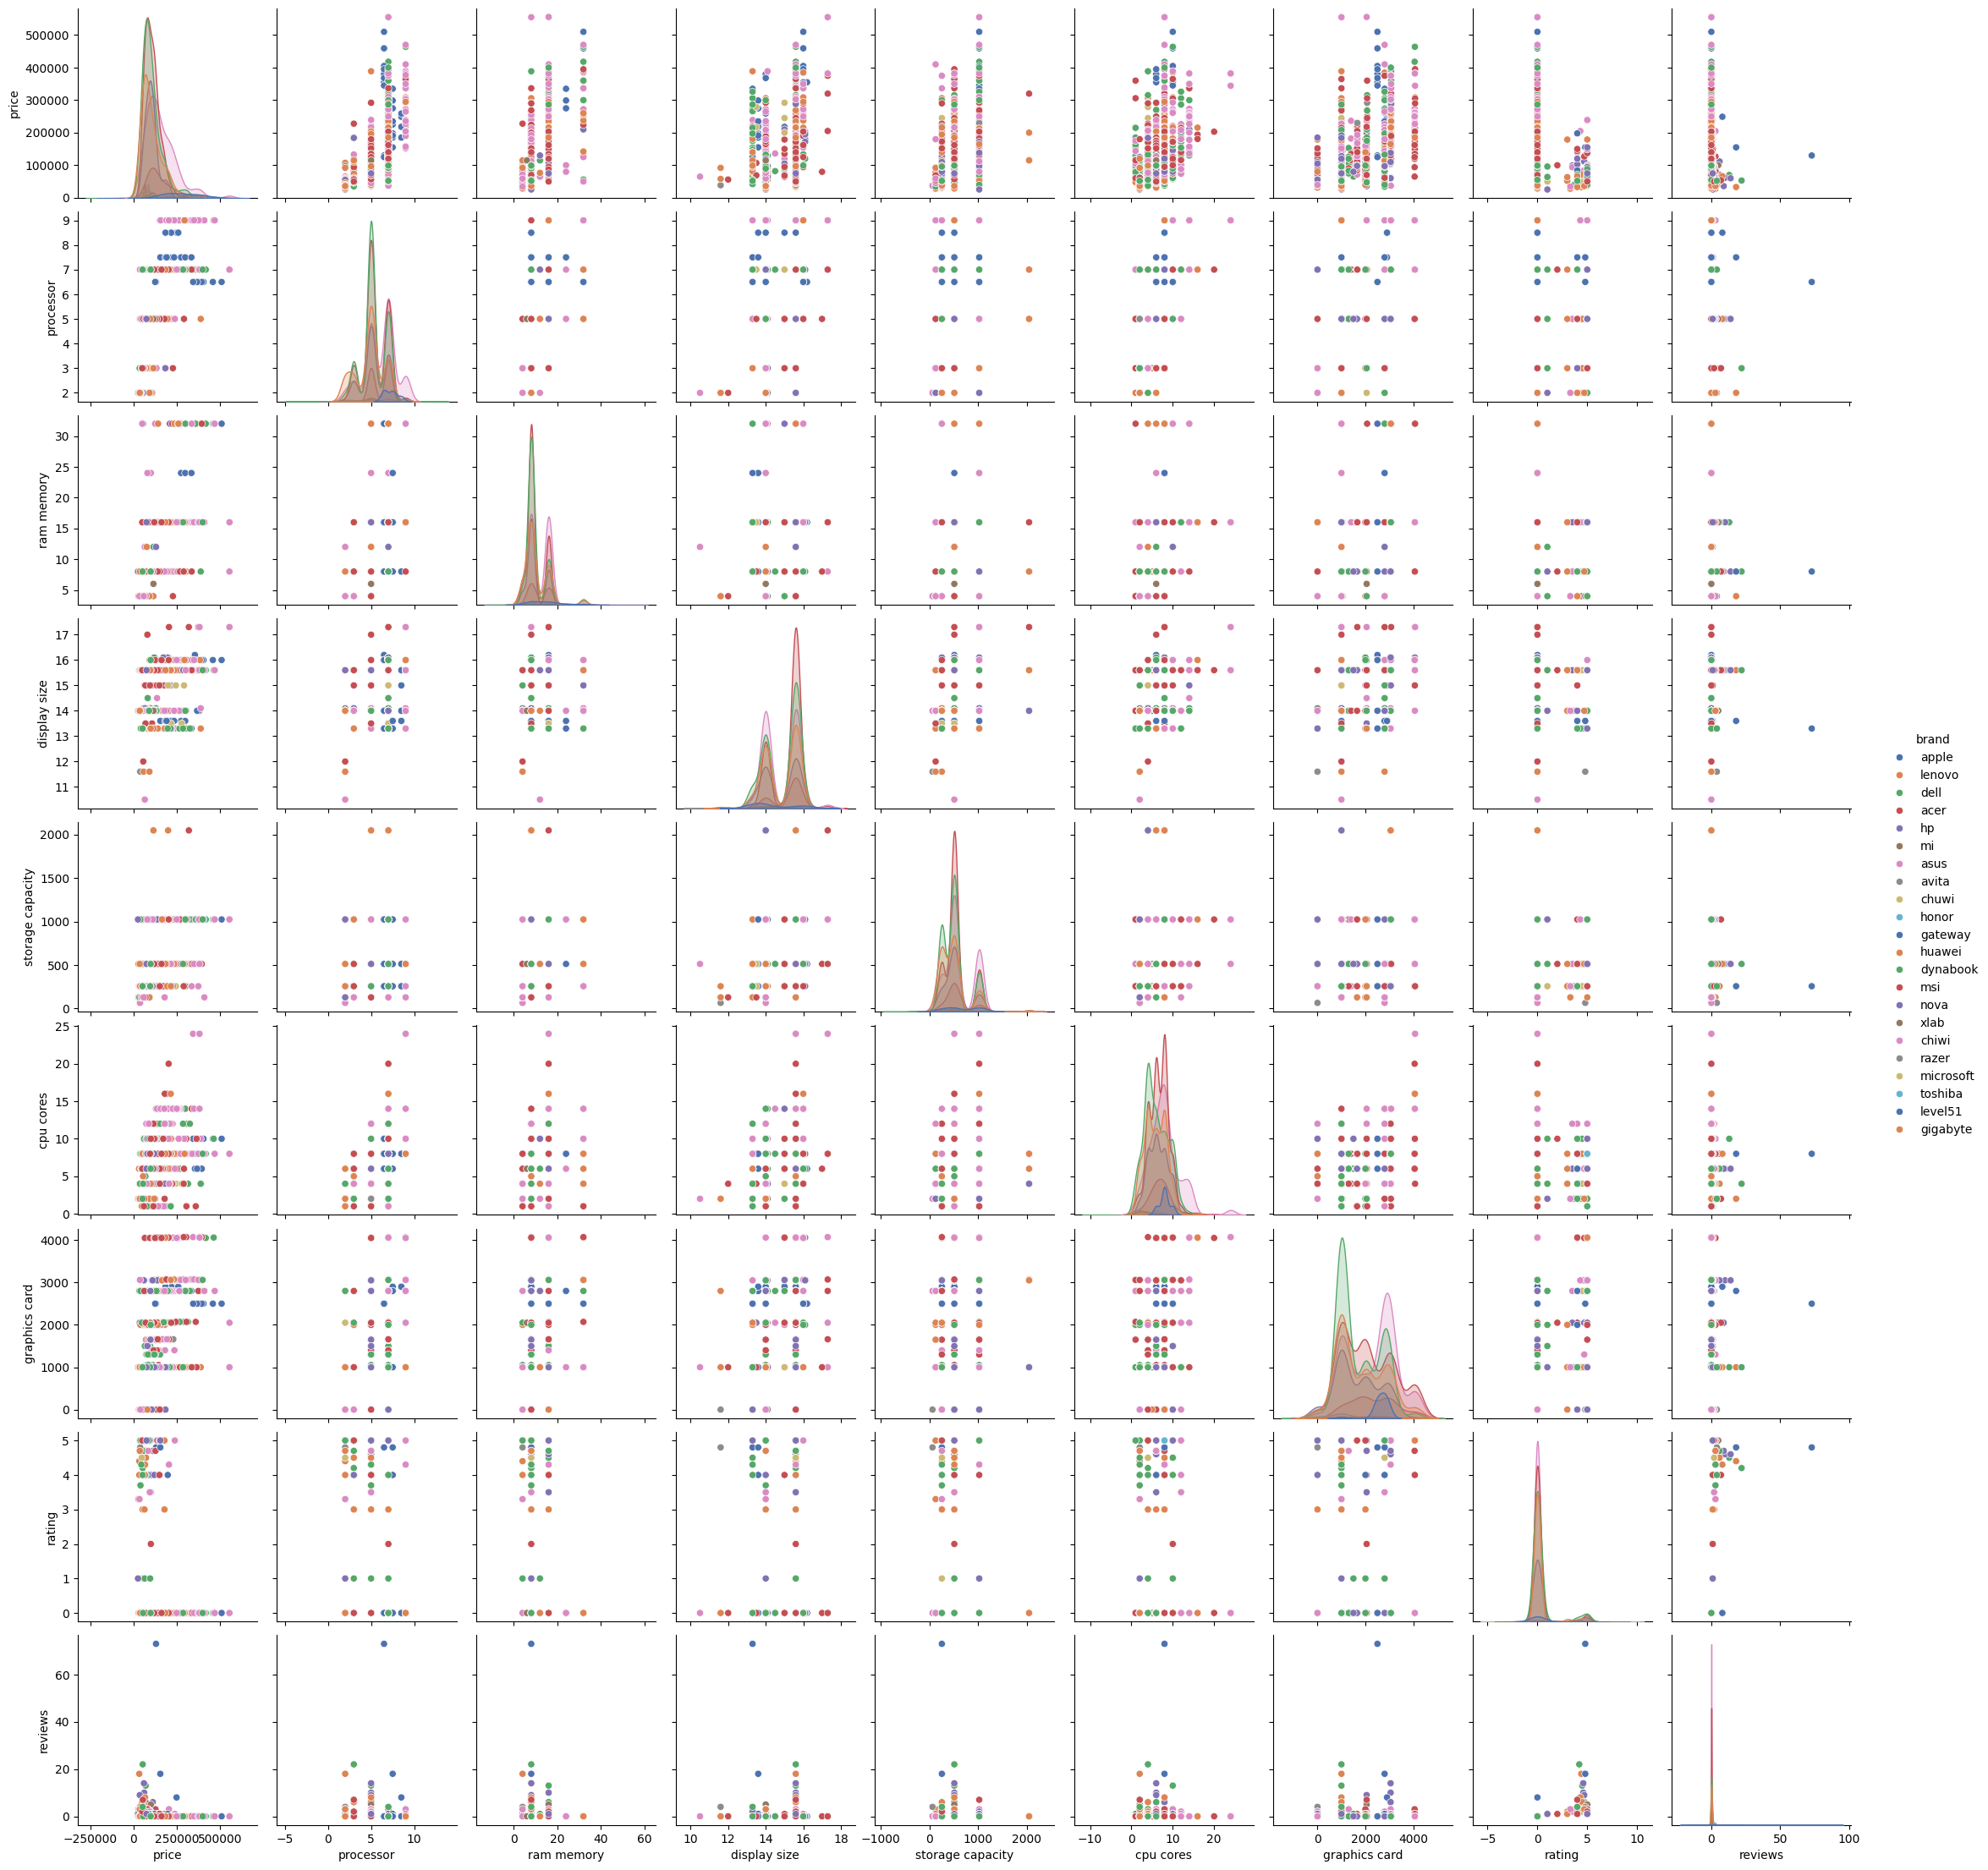

In [26]:
pairplot_data = laptop[pair_cols]
sns.pairplot(pairplot_data, hue='brand', palette='deep')
plt.show()